# Import Modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# First look at the data

In [19]:
df = pd.read_parquet("../data/bd_involuntary_turnover_data.parquet")

## HEAD data

In [5]:
df.head()

age_at_start=25:35  age_at_start=35:45  age_at_start=45:100  Gender=Male   
0                 1.0                 0.0                  0.0          1.0  \
1                 1.0                 0.0                  0.0          1.0   
2                 1.0                 0.0                  0.0          1.0   
3                 1.0                 0.0                  0.0          1.0   
4                 1.0                 0.0                  0.0          1.0   

   is_studying=Yes  education=02 - Undergraduate   
0              0.0                           1.0  \
1              0.0                           0.0   
2              0.0                           0.0   
3              0.0                           0.0   
4              1.0                           0.0   

   education=03 - College Degree  education=04 - MBA/Masters/Ph.D.   
0                            0.0                               0.0  \
1                            1.0                               0.0   
2                            0.0                               1.0   
3                            1.0                               0.0   
4                            1.0                               0.0   

   seniority=02 - Junior  seniority=03 - Semi Senior  ...  salary_bins=Q_4   
0                    0.0                         1.0  ...              1.0  \
1                    0.0                         1.0  ...              1.0   
2                    0.0                         1.0  ...              0.0   
3                    0.0                         1.0  ...              0.0   
4                    0.0                         1.0  ...              0.0   

   salary_bins=Q_5  last_perfor_assess=2 - Regular/Good Performance   
0              0.0                                              0.0  \
1              0.0                                              1.0   
2              1.0                                              1.0   
3              0.0                                              1.0   
4              1.0                                              1.0   

   last_perfor_assess=3 - Excellent Performance   
0                                           0.0  \
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   project_headcount=1 - Small [2 - 10]   
0                                   0.0  \
1                                   1.0   
2                                   1.0   
3                                   1.0   
4                                   0.0   

   project_headcount=2 - Medium [10 - 50]   
0                                     0.0  \
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   project_headcount=3 - Large [50 - 100]   
0                                     0.0  \
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   project_headcount=4 - Very Large [>100]      T      E  
0                                      0.0  118.0   True  
1                                      0.0  608.0  False  
2                                      0.0  427.0  False  
3                                      0.0  195.0  False  
4                                      1.0  811.0  False  

[5 rows x 34 columns]

## Checking types

no covertion needed

In [5]:
df.dtypes

age_at_start=25:35                                 float64
age_at_start=35:45                                 float64
age_at_start=45:100                                float64
Gender=Male                                        float64
is_studying=Yes                                    float64
education=02 - Undergraduate                       float64
education=03 - College Degree                      float64
education=04 - MBA/Masters/Ph.D.                   float64
seniority=02 - Junior                              float64
seniority=03 - Semi Senior                         float64
seniority=04 - Senior                              float64
seniority=05 - Architect                           float64
country_of_residence=Brazil                        float64
country_of_residence=Colombia                      float64
country_of_residence=Dominican Republic            float64
country_of_residence=Ecuador                       float64
country_of_residence=Guatemala                     float

In [6]:
df.iloc[:,:10].describe()

age_at_start=25:35  age_at_start=35:45  age_at_start=45:100   
count         2676.000000         2676.000000          2676.000000  \
mean             0.559417            0.297459             0.069507   
std              0.496550            0.457226             0.254361   
min              0.000000            0.000000             0.000000   
25%              0.000000            0.000000             0.000000   
50%              1.000000            0.000000             0.000000   
75%              1.000000            1.000000             0.000000   
max              1.000000            1.000000             1.000000   

       Gender=Male  is_studying=Yes  education=02 - Undergraduate   
count  2676.000000      2676.000000                   2676.000000  \
mean      0.874813         0.128550                      0.165172   
std       0.330993         0.334764                      0.371405   
min       0.000000         0.000000                      0.000000   
25%       1.000000         0.000000                      0.000000   
50%       1.000000         0.000000                      0.000000   
75%       1.000000         0.000000                      0.000000   
max       1.000000         1.000000                      1.000000   

       education=03 - College Degree  education=04 - MBA/Masters/Ph.D.   
count                    2676.000000                       2676.000000  \
mean                        0.620329                          0.198430   
std                         0.485396                          0.398893   
min                         0.000000                          0.000000   
25%                         0.000000                          0.000000   
50%                         1.000000                          0.000000   
75%                         1.000000                          0.000000   
max                         1.000000                          1.000000   

       seniority=02 - Junior  seniority=03 - Semi Senior  
count            2676.000000                 2676.000000  
mean                0.095665                    0.422646  
std                 0.294186                    0.494072  
min                 0.000000                    0.000000  
25%                 0.000000                    0.000000  
50%                 0.000000                    0.000000  
75%                 0.000000                    1.000000  
max                 1.000000                    1.000000

In [7]:
df.iloc[:,10:20].describe()

seniority=04 - Senior  seniority=05 - Architect   
count            2676.000000               2676.000000  \
mean                0.448057                  0.023543   
std                 0.497388                  0.151647   
min                 0.000000                  0.000000   
25%                 0.000000                  0.000000   
50%                 0.000000                  0.000000   
75%                 1.000000                  0.000000   
max                 1.000000                  1.000000   

       country_of_residence=Brazil  country_of_residence=Colombia   
count                  2676.000000                    2676.000000  \
mean                      0.355381                       0.126308   
std                       0.478718                       0.332258   
min                       0.000000                       0.000000   
25%                       0.000000                       0.000000   
50%                       0.000000                       0.000000   
75%                       1.000000                       0.000000   
max                       1.000000                       1.000000   

       country_of_residence=Dominican Republic  country_of_residence=Ecuador   
count                              2676.000000                   2676.000000  \
mean                                  0.076233                      0.033632   
std                                   0.265420                      0.180314   
min                                   0.000000                      0.000000   
25%                                   0.000000                      0.000000   
50%                                   0.000000                      0.000000   
75%                                   0.000000                      0.000000   
max                                   1.000000                      1.000000   

       country_of_residence=Guatemala  country_of_residence=Mexico   
count                     2676.000000                  2676.000000  \
mean                         0.029522                     0.107250   
std                          0.169295                     0.309488   
min                          0.000000                     0.000000   
25%                          0.000000                     0.000000   
50%                          0.000000                     0.000000   
75%                          0.000000                     0.000000   
max                          1.000000                     1.000000   

       country_of_residence=Other  country_of_residence=Peru  
count                 2676.000000                2676.000000  
mean                     0.174888                   0.042601  
std                      0.379942                   0.201993  
min                      0.000000                   0.000000  
25%                      0.000000                   0.000000  
50%                      0.000000                   0.000000  
75%                      0.000000                   0.000000  
max                      1.000000                   1.000000

In [8]:
df.iloc[:,20:].describe()

country_of_residence=United States  country_of_residence=Venezuela   
count                         2676.000000                     2676.000000  \
mean                             0.002242                        0.034380   
std                              0.047307                        0.182236   
min                              0.000000                        0.000000   
25%                              0.000000                        0.000000   
50%                              0.000000                        0.000000   
75%                              0.000000                        0.000000   
max                              1.000000                        1.000000   

       salary_bins=Q_2  salary_bins=Q_3  salary_bins=Q_4  salary_bins=Q_5   
count      2676.000000      2676.000000      2676.000000      2676.000000  \
mean          0.177877         0.191330         0.247758         0.189462   
std           0.382481         0.393422         0.431791         0.391948   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       last_perfor_assess=2 - Regular/Good Performance   
count                                      2676.000000  \
mean                                          0.569133   
std                                           0.495290   
min                                           0.000000   
25%                                           0.000000   
50%                                           1.000000   
75%                                           1.000000   
max                                           1.000000   

       last_perfor_assess=3 - Excellent Performance   
count                                   2676.000000  \
mean                                       0.309791   
std                                        0.462494   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        1.000000   

       project_headcount=1 - Small [2 - 10]   
count                           2676.000000  \
mean                               0.315396   
std                                0.464760   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                1.000000   
max                                1.000000   

       project_headcount=2 - Medium [10 - 50]   
count                             2676.000000  \
mean                                 0.269806   
std                                  0.443942   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  1.000000   
max                                  1.000000   

       project_headcount=3 - Large [50 - 100]   
count                             2676.000000  \
mean                                 0.033632   
std                                  0.180314   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       project_headcount=4 - Very Large [>100]            T  
count                              2676.000000  2676.000000  
mean                                  0.332586   453.148729  
std                                   0.471228   259.615191  
min                                   0.0000

## Bar plot group of columns

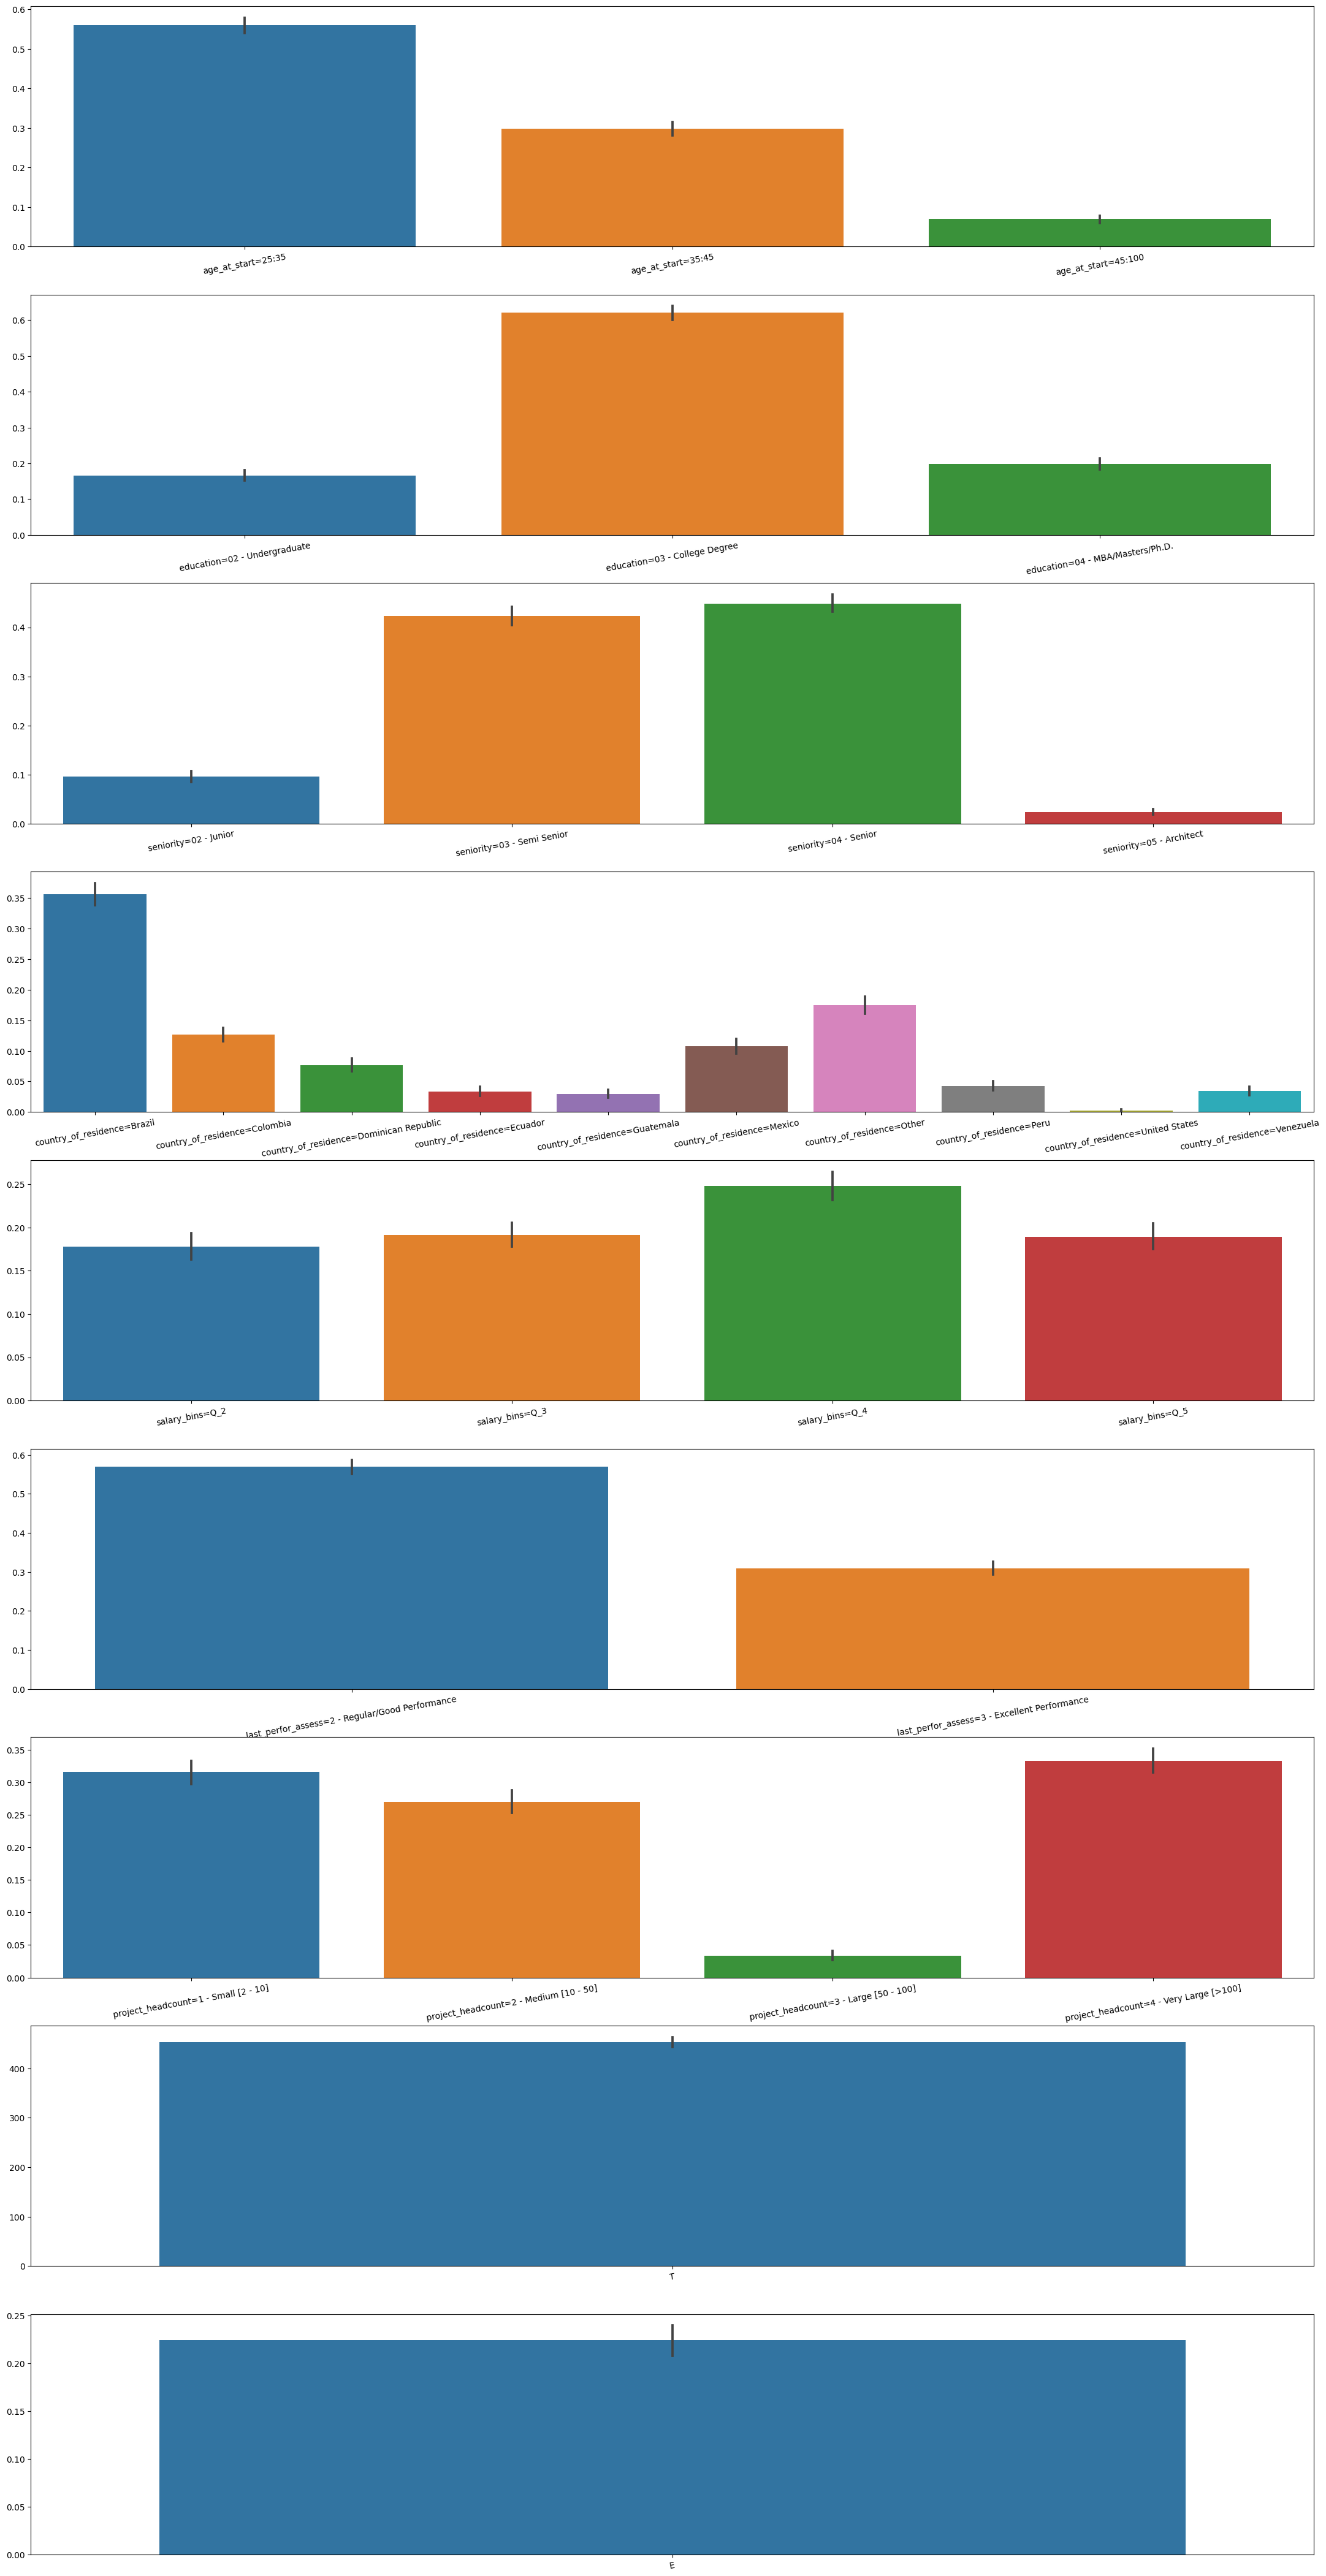

In [9]:
age_group = ("Age", [column for column in df.columns if "age" in column])
education_group = ("Education", [column for column in df.columns if "education" in column])
seniority_group = ("Seniority", [column for column in df.columns if "seniority" in column])
country_group = ("Country", [column for column in df.columns if "country" in column])
salary_group = ("Salary", [column for column in df.columns if "salary" in column])
performance_group = (
    "Performance", [column for column in df.columns if "Performance" in column])
headcount_group = (
    "Headcount", [column for column in df.columns if "headcount" in column])
Time_group = (
    "Time", ["T"])
turnover_group = (
    "Turnover", ["E"])
groups = [age_group, education_group, seniority_group, country_group,
          salary_group, performance_group, headcount_group, Time_group, turnover_group]

f, axes = plt.subplots(len(groups), 1)
f.set_figwidth(int(len(groups)*3))
f.set_figheight(int(len(groups)*6))
for i, group in enumerate(groups):    
    sns.barplot(data=df[group[1]], ax=axes[i])
    axes[i].set_xticklabels(group[1], rotation = 10)

# Correlations

To check the correlation I'll be joinning back the one-hot encoded variables

## Join varibles

In [24]:
coutries_columns = list(map(lambda x: [x], list(filter(lambda c: "country" in c, df.columns))))
countries = list(map(lambda c: c.split('=')[1], list(
    filter(lambda c: "country" in c, df.columns))))

In [11]:
groups

[('Age', ['age_at_start=25:35', 'age_at_start=35:45', 'age_at_start=45:100']),
 ('Education',
  ['education=02 - Undergraduate',
   'education=03 - College Degree',
   'education=04 - MBA/Masters/Ph.D.']),
 ('Seniority',
  ['seniority=02 - Junior',
   'seniority=03 - Semi Senior',
   'seniority=04 - Senior',
   'seniority=05 - Architect']),
 ('Country',
  ['country_of_residence=Brazil',
   'country_of_residence=Colombia',
   'country_of_residence=Dominican Republic',
   'country_of_residence=Ecuador',
   'country_of_residence=Guatemala',
   'country_of_residence=Mexico',
   'country_of_residence=Other',
   'country_of_residence=Peru',
   'country_of_residence=United States',
   'country_of_residence=Venezuela']),
 ('Salary',
  ['salary_bins=Q_2',
   'salary_bins=Q_3',
   'salary_bins=Q_4',
   'salary_bins=Q_5']),
 ('Performance',
  ['last_perfor_assess=2 - Regular/Good Performance',
   'last_perfor_assess=3 - Excellent Performance']),
 ('Headcount',
  ['project_headcount=1 - Small [2 -

In [12]:
countries_groups = list(zip(countries, coutries_columns))
age_group = ("Age", [column for column in df.columns if "age" in column])
education_group = (
    "Education", [column for column in df.columns if "education" in column])
seniority_group = (
    "Seniority", [column for column in df.columns if "seniority" in column])
salary_group = (
    "Salary", [column for column in df.columns if "salary" in column])
performance_group = (
    "Performance", [column for column in df.columns if "Performance" in column])
headcount_group = (
    "Headcount", [column for column in df.columns if "headcount" in column])
Time_group = (
    "Time", ["T"])
turnover_group = [(
    "Turnover", ["E"])]
groups = [age_group, education_group, seniority_group, salary_group,
          performance_group, headcount_group, Time_group]
groups.extend(countries_groups)
groups.extend(turnover_group)

data_dict = {}
for group in groups:
    n_columns = len(group[1])
    print(group[1])
    df_group = df[group[1]]
    if n_columns > 1:
        df_group[group[0]] = df_group.apply(
            lambda row: sum(row * np.arange(1, n_columns+1)), axis=1)
    else:
        df_group[group[0]] = df_group.iloc[:,0]
    data_dict[group[0]] = df_group[group[0]].values

joined_df = pd.DataFrame(data_dict)

['age_at_start=25:35', 'age_at_start=35:45', 'age_at_start=45:100']
['education=02 - Undergraduate', 'education=03 - College Degree', 'education=04 - MBA/Masters/Ph.D.']
['seniority=02 - Junior', 'seniority=03 - Semi Senior', 'seniority=04 - Senior', 'seniority=05 - Architect']
['salary_bins=Q_2', 'salary_bins=Q_3', 'salary_bins=Q_4', 'salary_bins=Q_5']


/tmp/ipykernel_8985/181337094.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[group[0]] = df_group.apply(
/tmp/ipykernel_8985/181337094.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[group[0]] = df_group.apply(
/tmp/ipykernel_8985/181337094.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

['last_perfor_assess=2 - Regular/Good Performance', 'last_perfor_assess=3 - Excellent Performance']
['project_headcount=1 - Small [2 - 10]', 'project_headcount=2 - Medium [10 - 50]', 'project_headcount=3 - Large [50 - 100]', 'project_headcount=4 - Very Large [>100]']
['T']
['country_of_residence=Brazil']
['country_of_residence=Colombia']
['country_of_residence=Dominican Republic']
['country_of_residence=Ecuador']
['country_of_residence=Guatemala']
['country_of_residence=Mexico']
['country_of_residence=Other']
['country_of_residence=Peru']
['country_of_residence=United States']
['country_of_residence=Venezuela']
['E']


/tmp/ipykernel_8985/181337094.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[group[0]] = df_group.apply(
/tmp/ipykernel_8985/181337094.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[group[0]] = df_group.apply(
/tmp/ipykernel_8985/181337094.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [13]:
joined_df.head()

Age  Education  Seniority  Salary  Performance  Headcount   Time  Brazil   
0  1.0        1.0        2.0     3.0          0.0        0.0  118.0     1.0  \
1  1.0        2.0        2.0     3.0          1.0        1.0  608.0     0.0   
2  1.0        3.0        2.0     4.0          1.0        1.0  427.0     0.0   
3  1.0        2.0        2.0     0.0          1.0        1.0  195.0     0.0   
4  1.0        2.0        2.0     4.0          1.0        4.0  811.0     0.0   

   Colombia  Dominican Republic  Ecuador  Guatemala  Mexico  Other  Peru   
0       0.0                 0.0      0.0        0.0     0.0    0.0   0.0  \
1       0.0                 0.0      0.0        0.0     0.0    0.0   1.0   
2       0.0                 0.0      0.0        0.0     1.0    0.0   0.0   
3       0.0                 0.0      0.0        0.0     0.0    0.0   1.0   
4       0.0                 0.0      0.0        0.0     0.0    1.0   0.0   

   United States  Venezuela  Turnover  
0            0.0        0.0      True  
1            0.0        0.0     False  
2            0.0        0.0     False  
3            0.0        0.0     False  
4            0.0        0.0     False

In [14]:
color_map = sns.diverging_palette(220, 20, as_cmap=True)

## pearson

is a linear correlation: 1- is when both variables share a linear mutual increase or decrease

### Joinned

<Axes: >

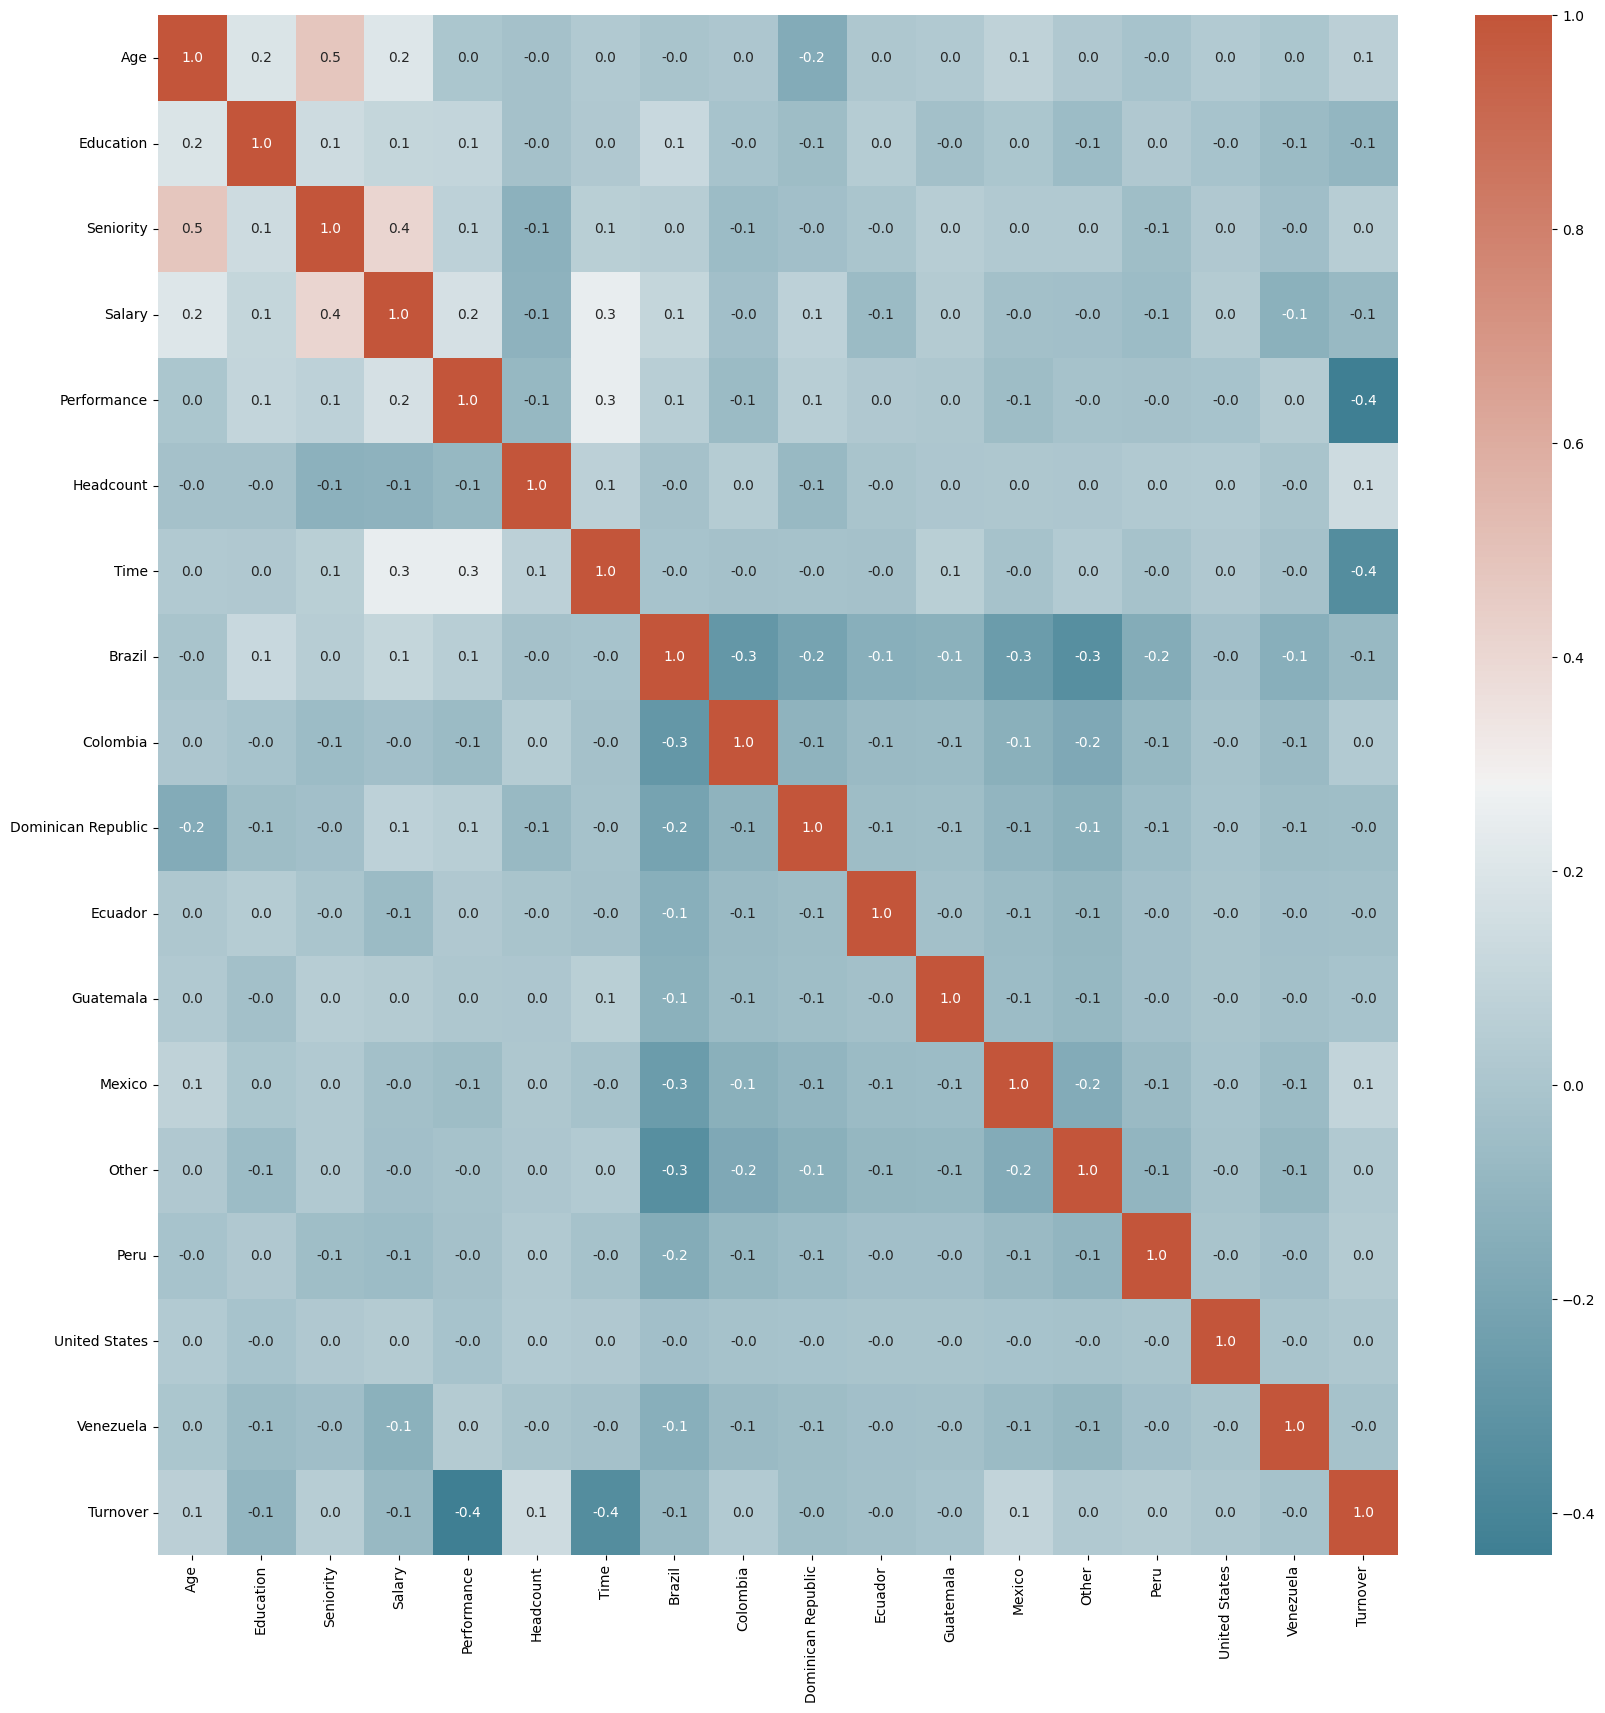

In [15]:
plt.figure(figsize=(20, 20))
sns.heatmap(joined_df.corr(method="pearson"),
            annot=True, fmt=".1f", cmap=color_map)


### One Hot Encoded

<Axes: >

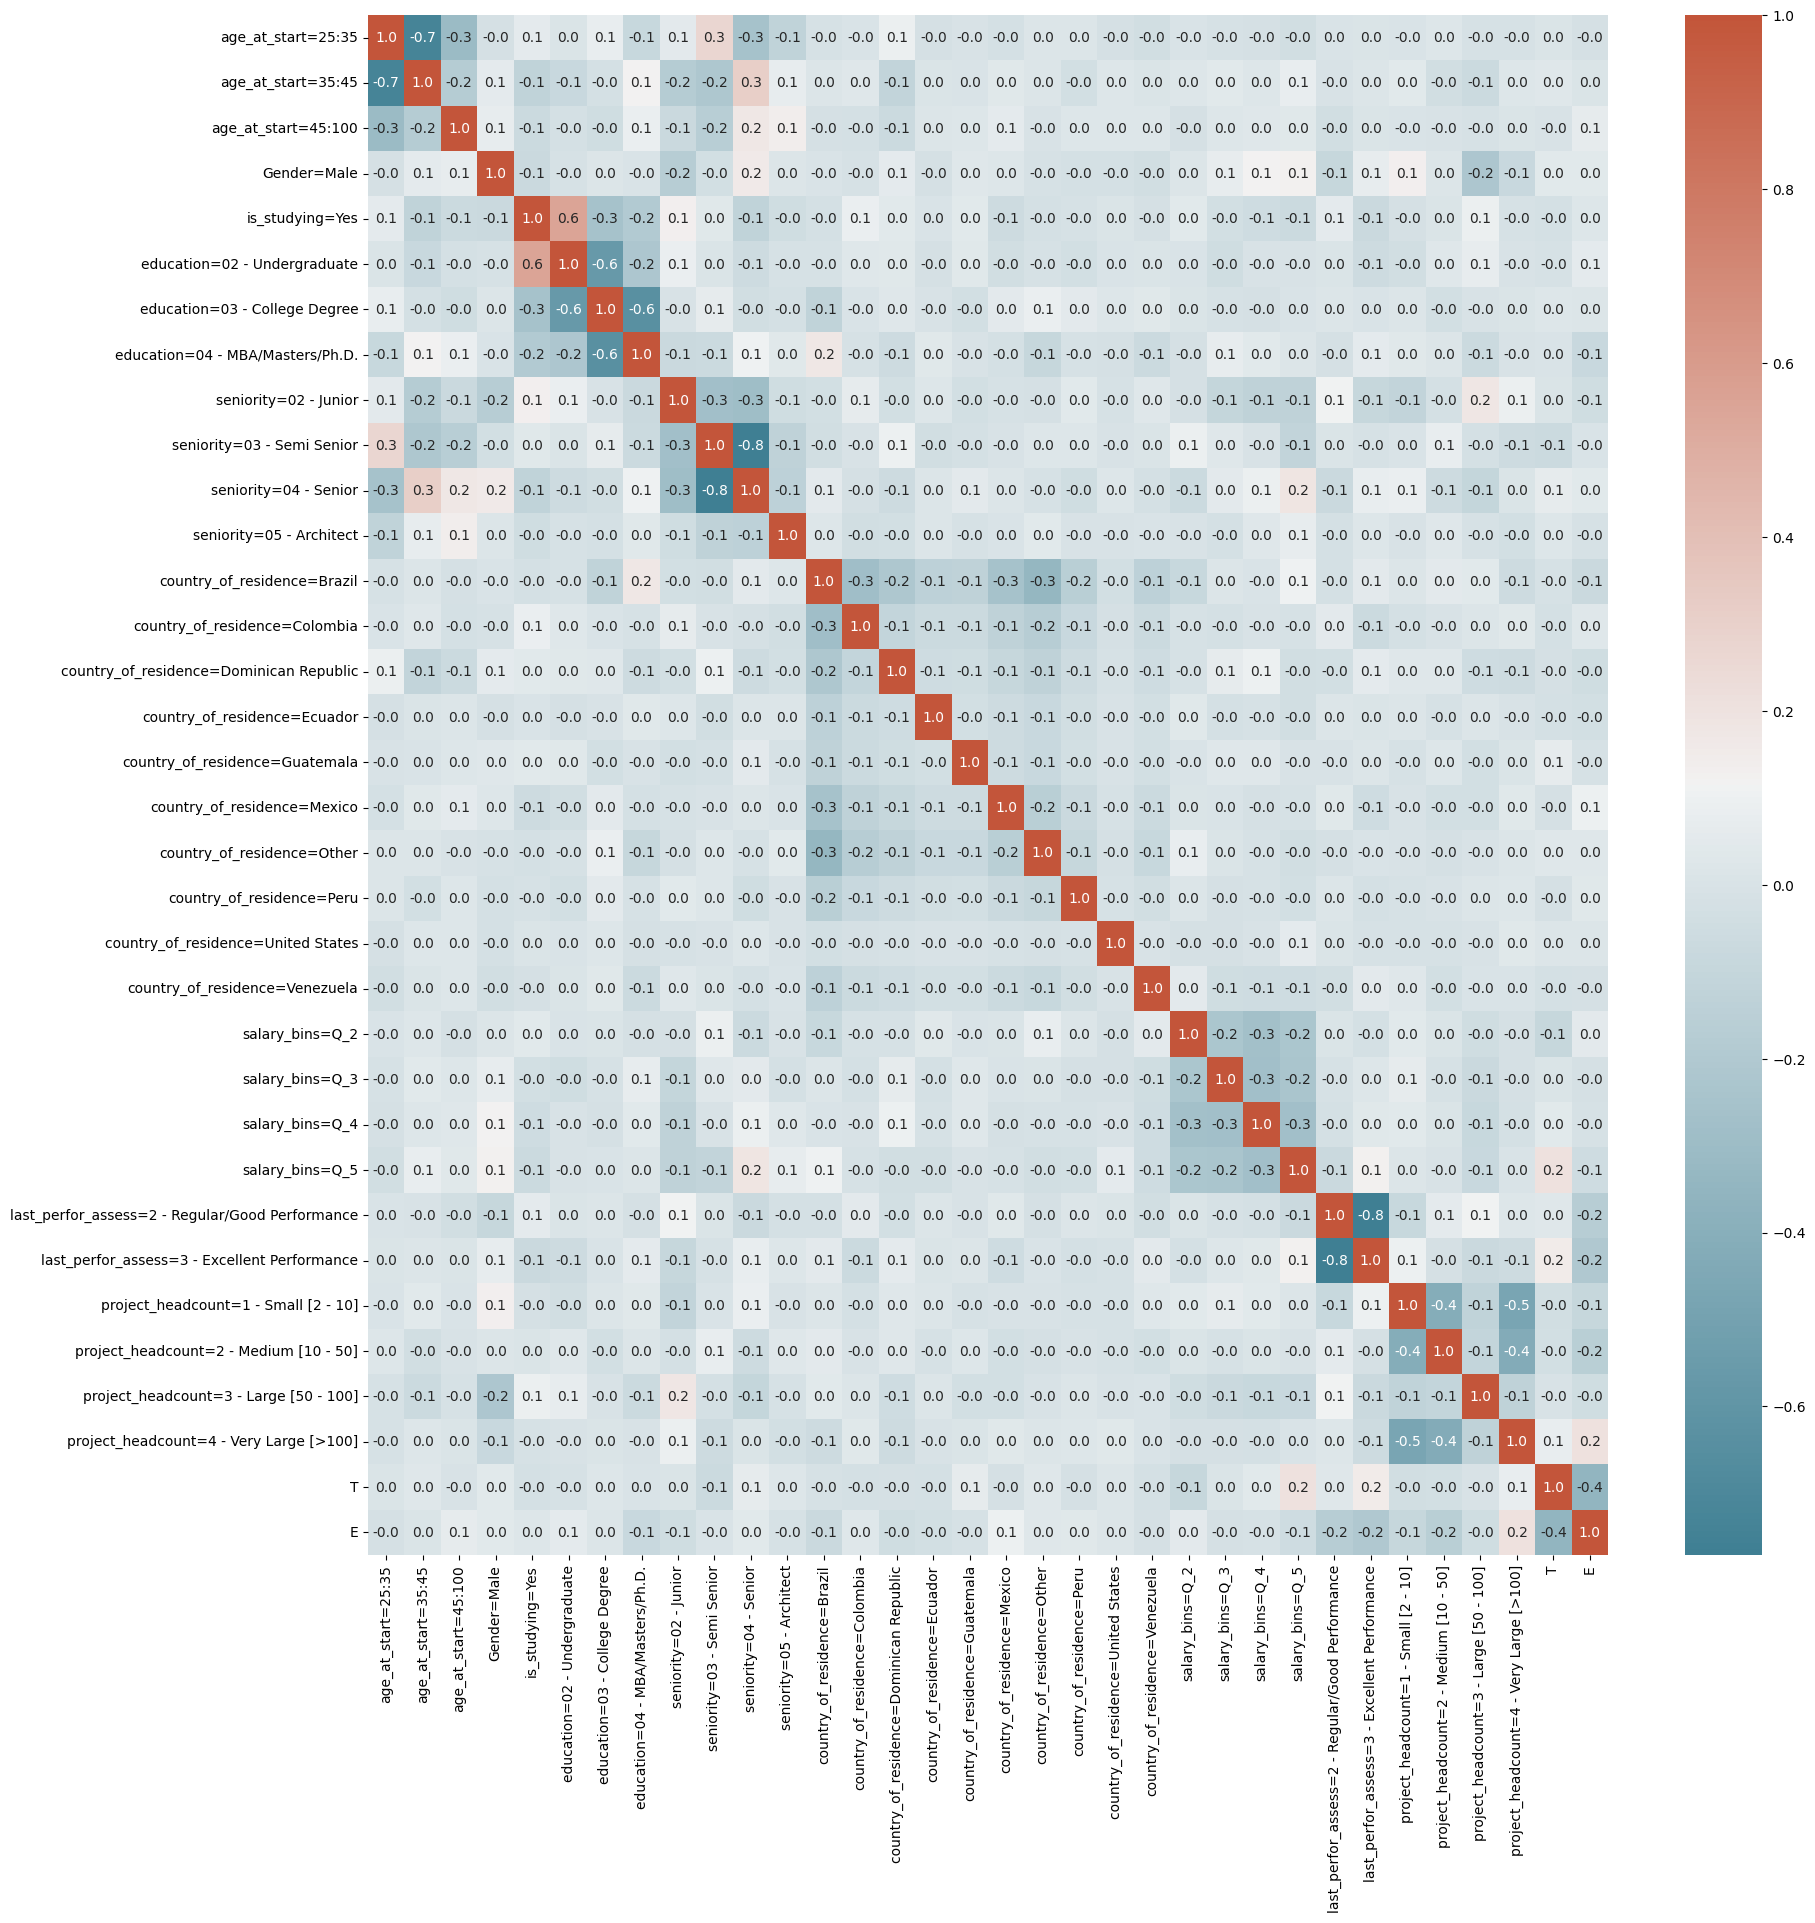

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(method="pearson"), annot=True, fmt=".1f", cmap=color_map)

## spearmanm

is a nonlinear correlation: uses the rank of the sorting function to compare the monotonicity between variables

### Joinned

<Axes: >

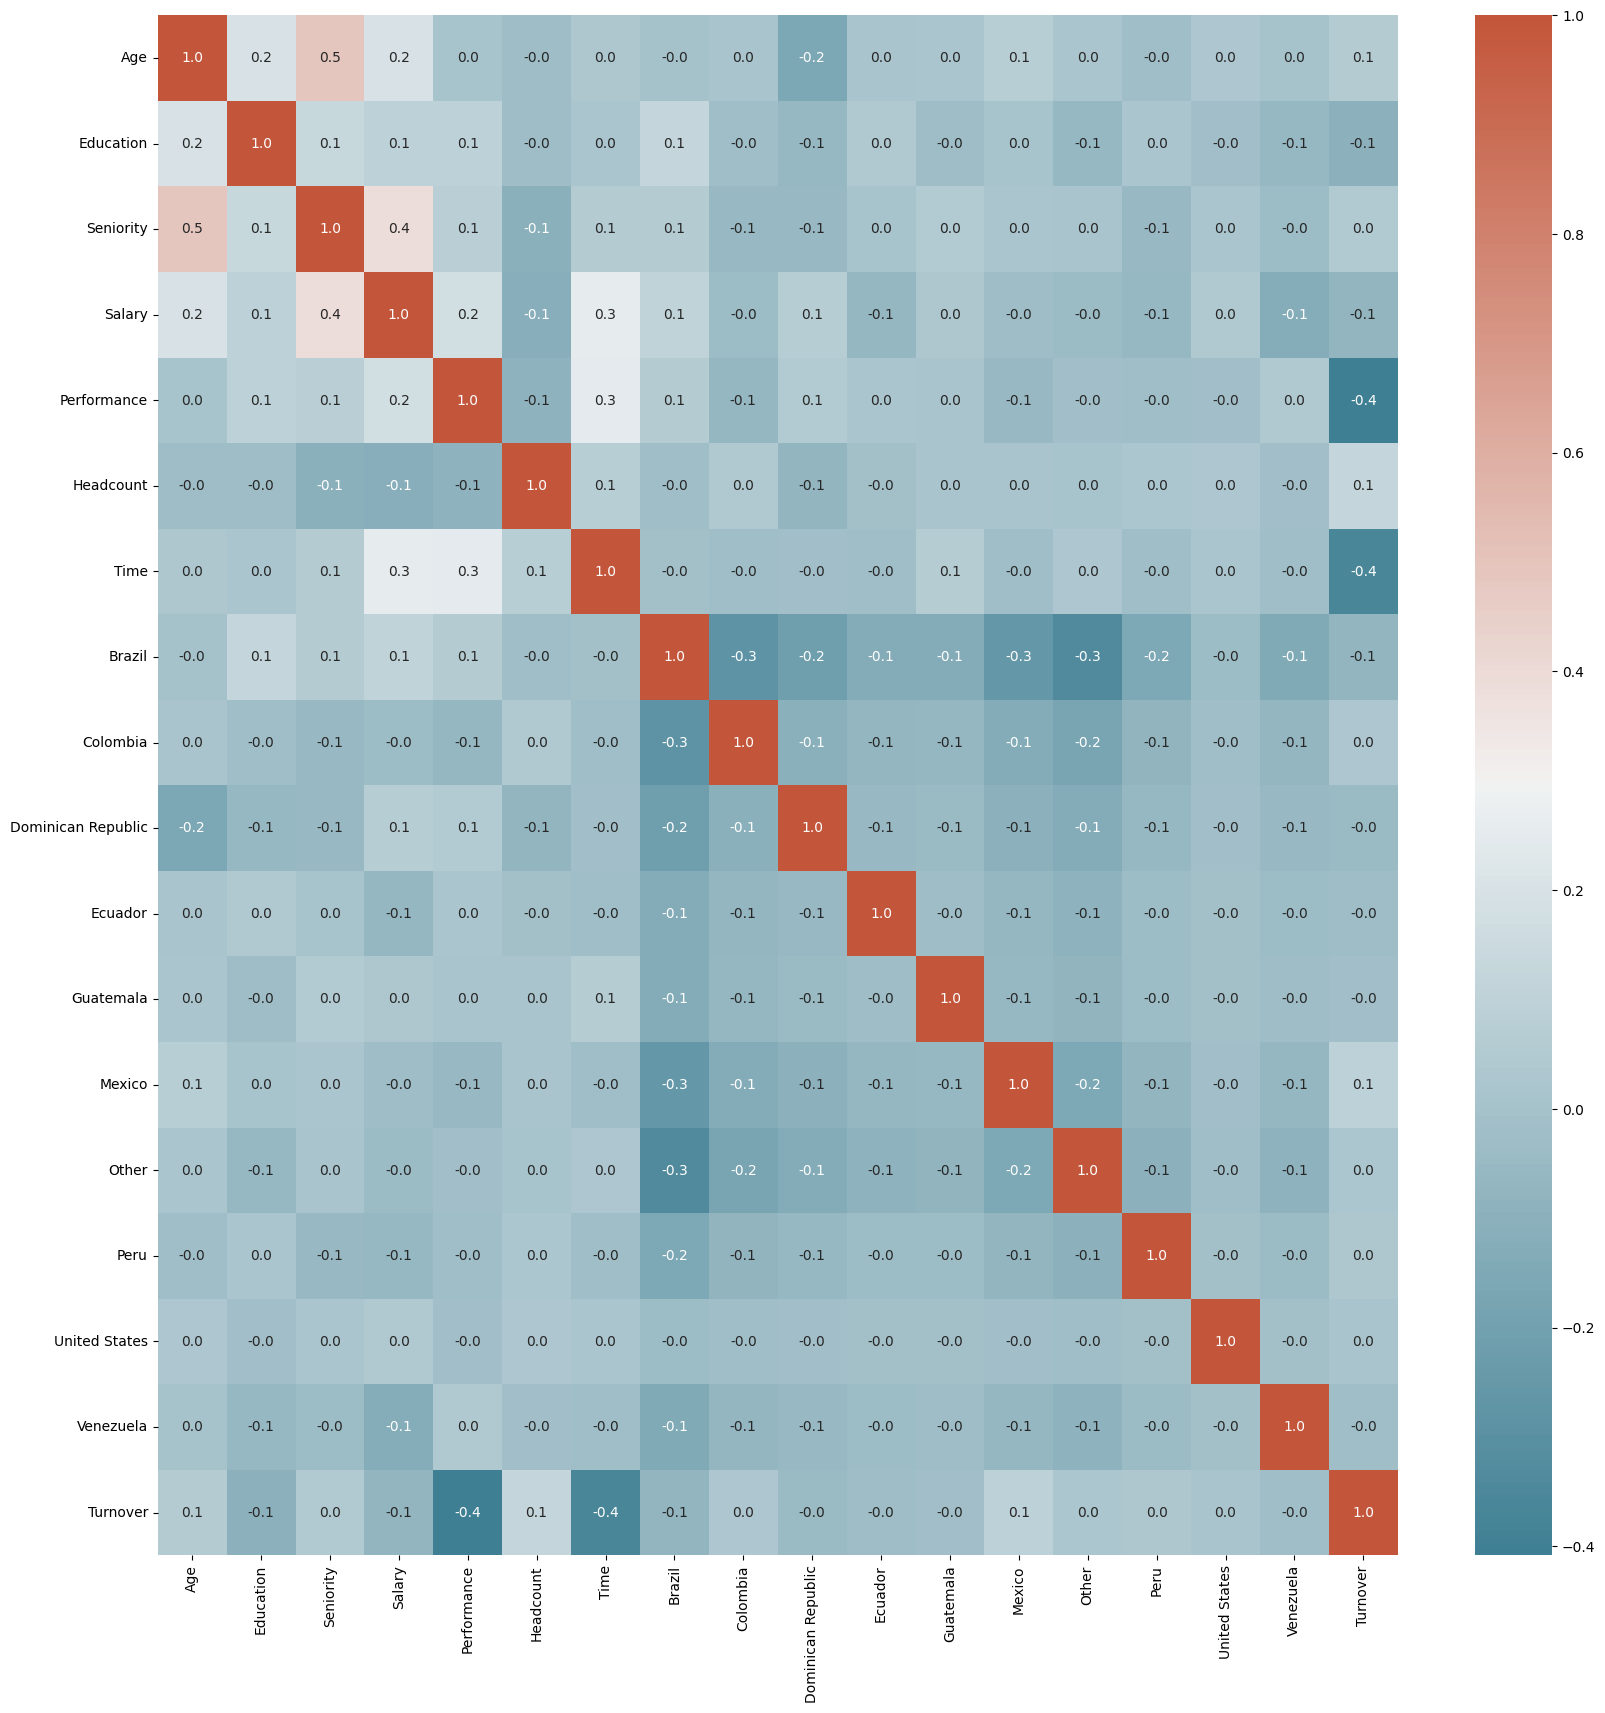

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(joined_df.corr(method="spearman"),
            annot=True, fmt=".1f", cmap=color_map)


### One hot encoded

<Axes: >

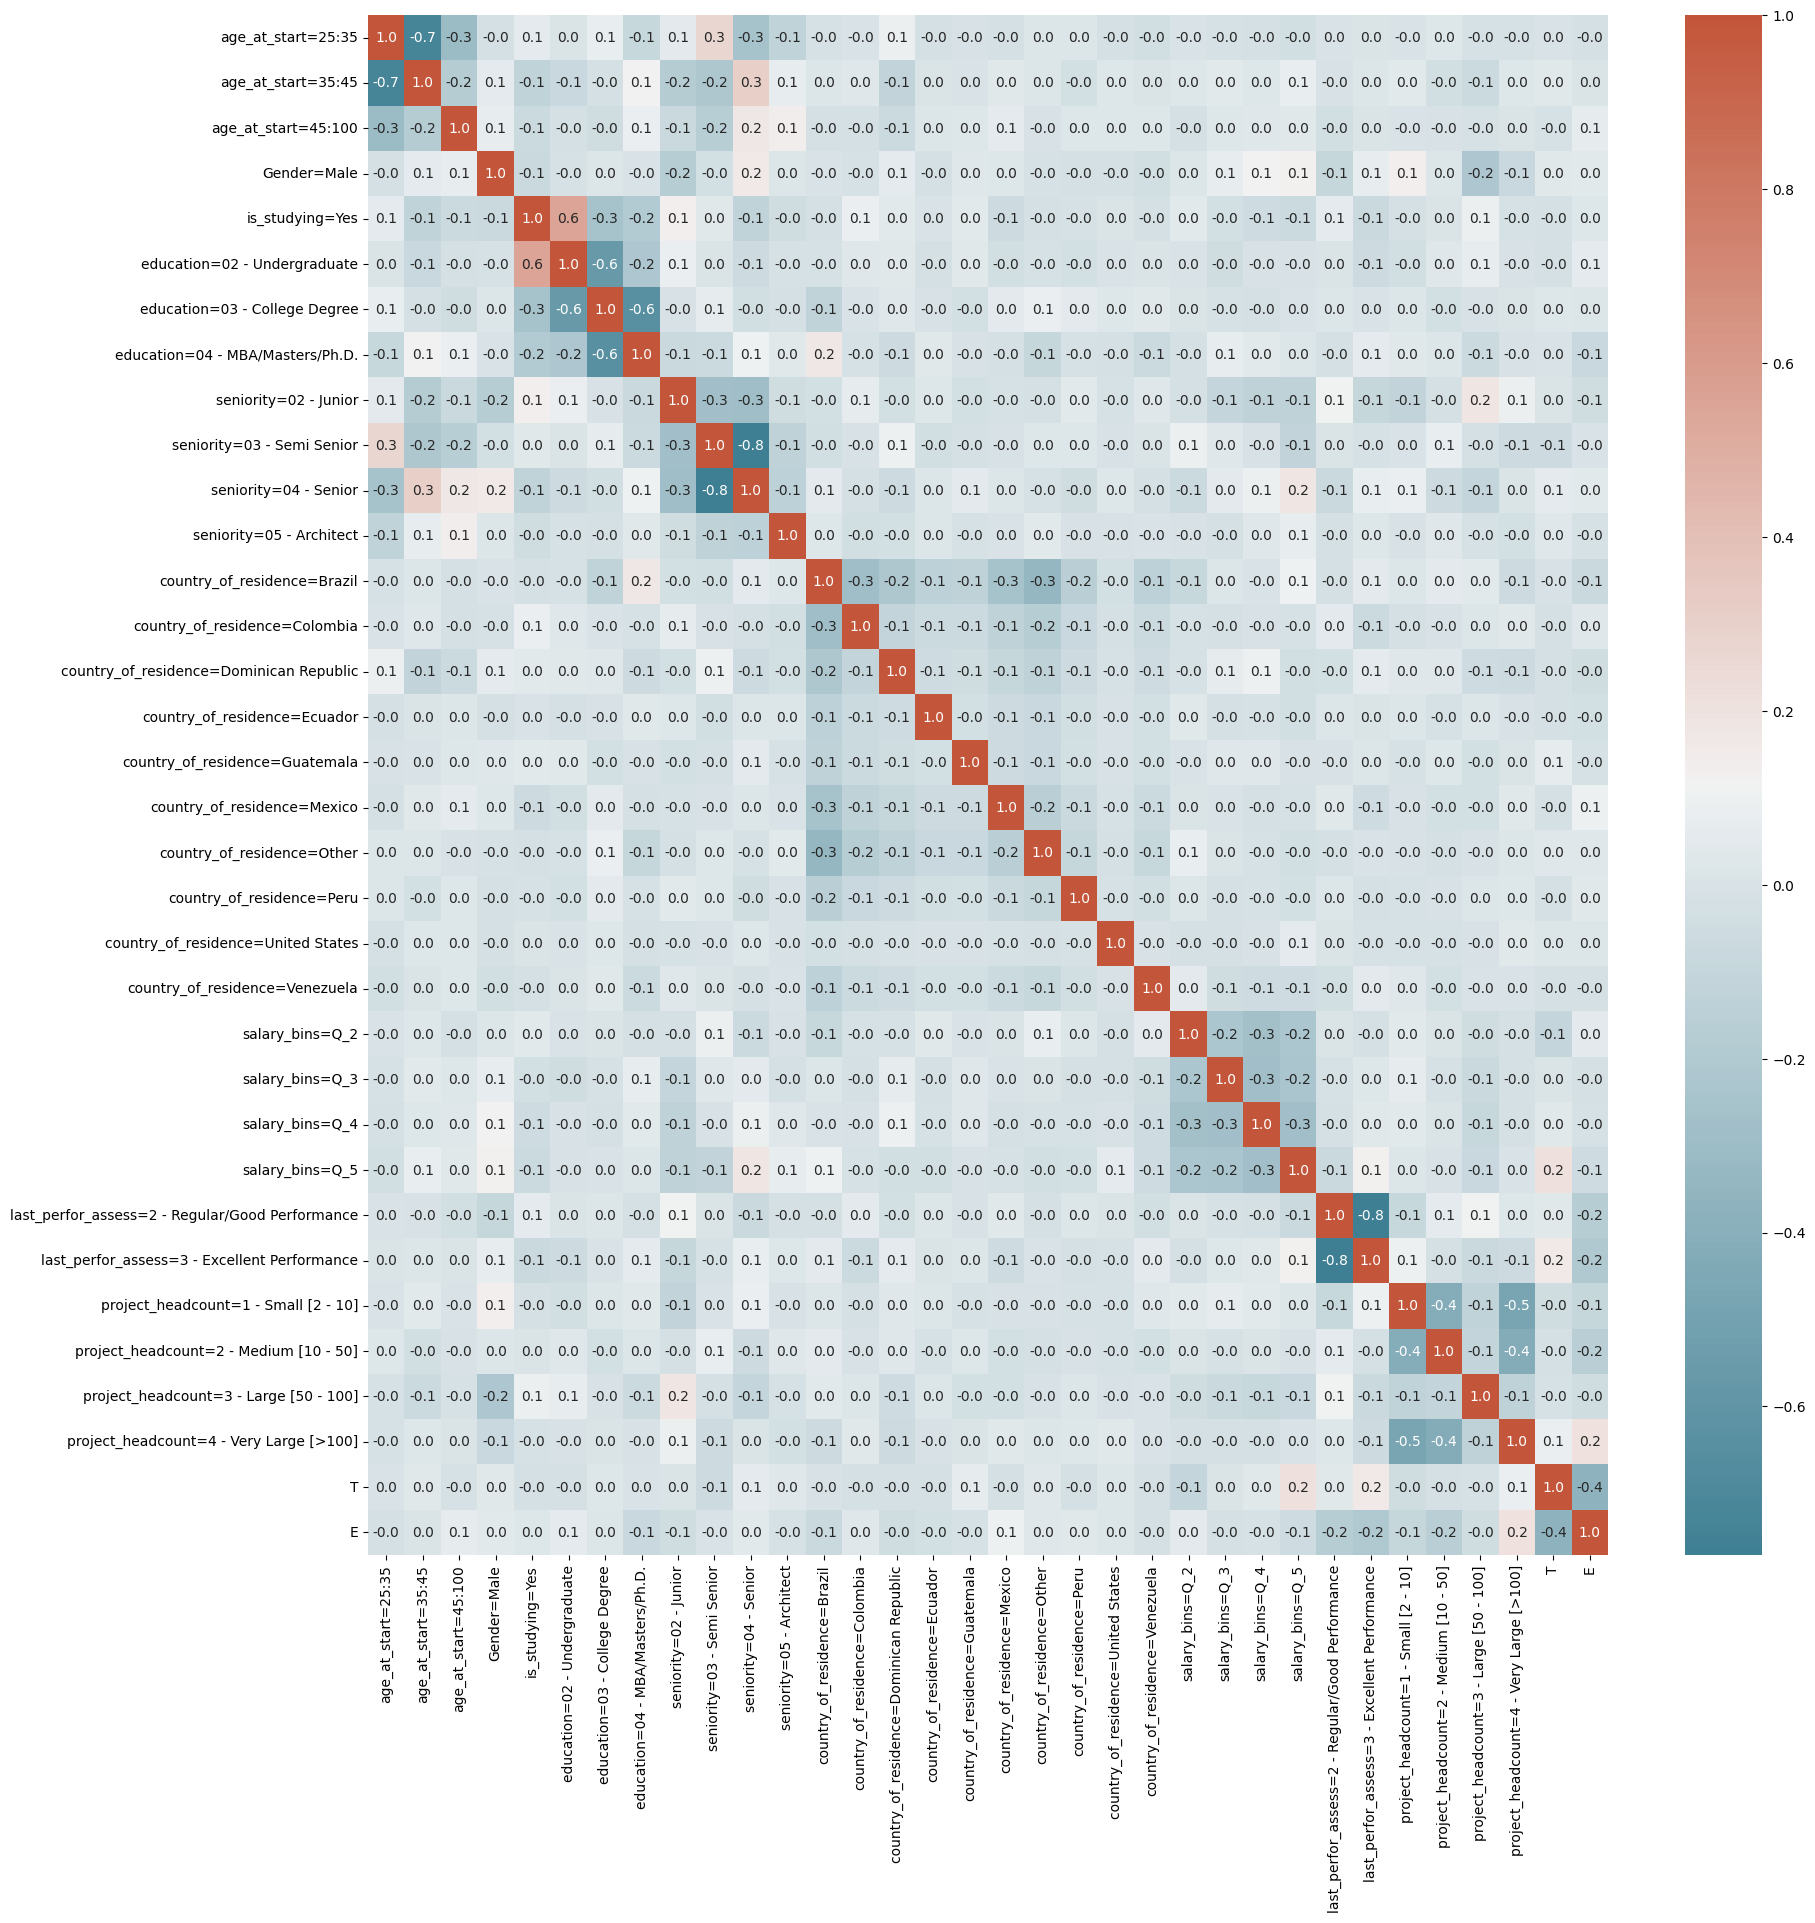

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method="spearman"), annot=True, fmt=".1f", cmap=color_map)


# Decision Tree visualization Per Country

By checking the correlations One could be choosing Performance and Time to see the Decision tree estimation. however The salary has a medium correlation with performance, and salary has a medium correlation with Time. Also, Time will have more unique values so this is going to increase the Decision Tree depth.

In [29]:
countries = countries = list(map(lambda c: c.split('=')[1], list(
    filter(lambda c: "country" in c, df.columns))))

['Brazil', 'Colombia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mexico', 'Other', 'Peru', 'United States', 'Venezuela']
      Seniority  Salary  Performance
0           2.0     3.0          0.0
5           1.0     0.0          0.0
6           2.0     4.0          1.0
7           3.0     3.0          2.0
8           2.0     0.0          2.0
...         ...     ...          ...
2662        2.0     2.0          0.0
2666        2.0     3.0          2.0
2669        2.0     1.0          2.0
2671        1.0     1.0          1.0
2674        2.0     3.0          1.0

[951 rows x 3 columns]
0        True
5       False
6       False
7       False
8       False
        ...  
2662     True
2666    False
2669    False
2671    False
2674    False
Name: Turnover, Length: 951, dtype: bool


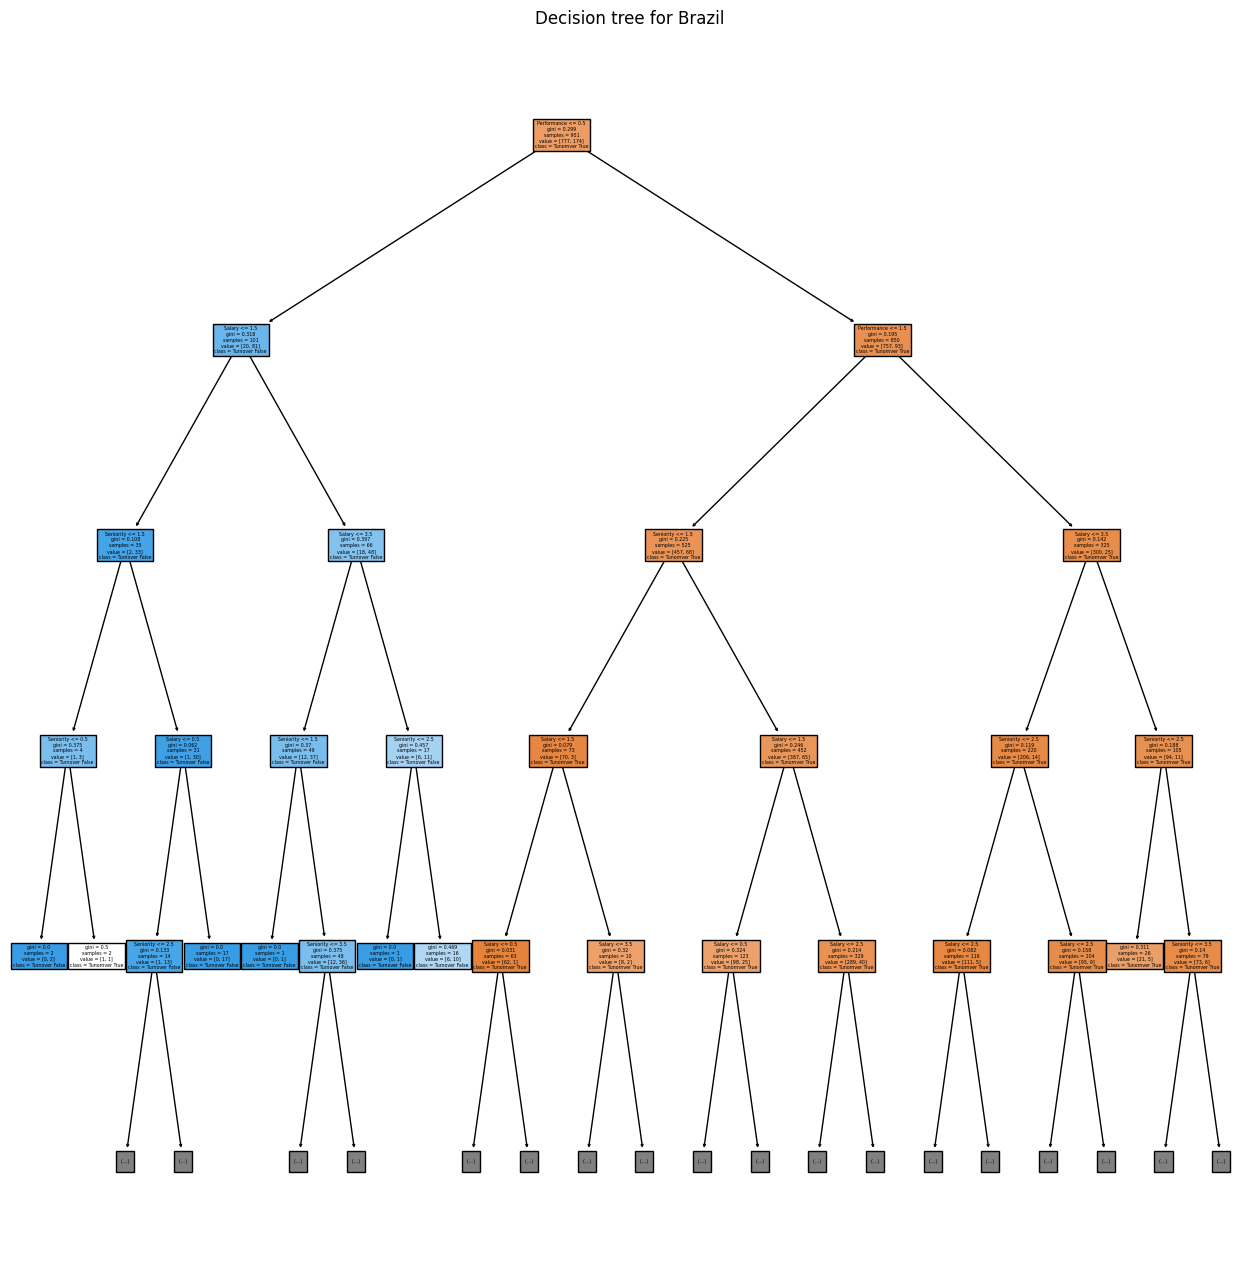

['Brazil', 'Colombia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mexico', 'Other', 'Peru', 'United States', 'Venezuela']
      Seniority  Salary  Performance
10          3.0     3.0          1.0
23          3.0     4.0          1.0
31          3.0     3.0          1.0
33          2.0     0.0          1.0
44          2.0     0.0          1.0
...         ...     ...          ...
2649        2.0     0.0          1.0
2651        2.0     3.0          2.0
2655        2.0     3.0          2.0
2668        2.0     3.0          0.0
2670        2.0     2.0          1.0

[338 rows x 3 columns]
10      False
23      False
31      False
33       True
44      False
        ...  
2649    False
2651    False
2655    False
2668     True
2670     True
Name: Turnover, Length: 338, dtype: bool


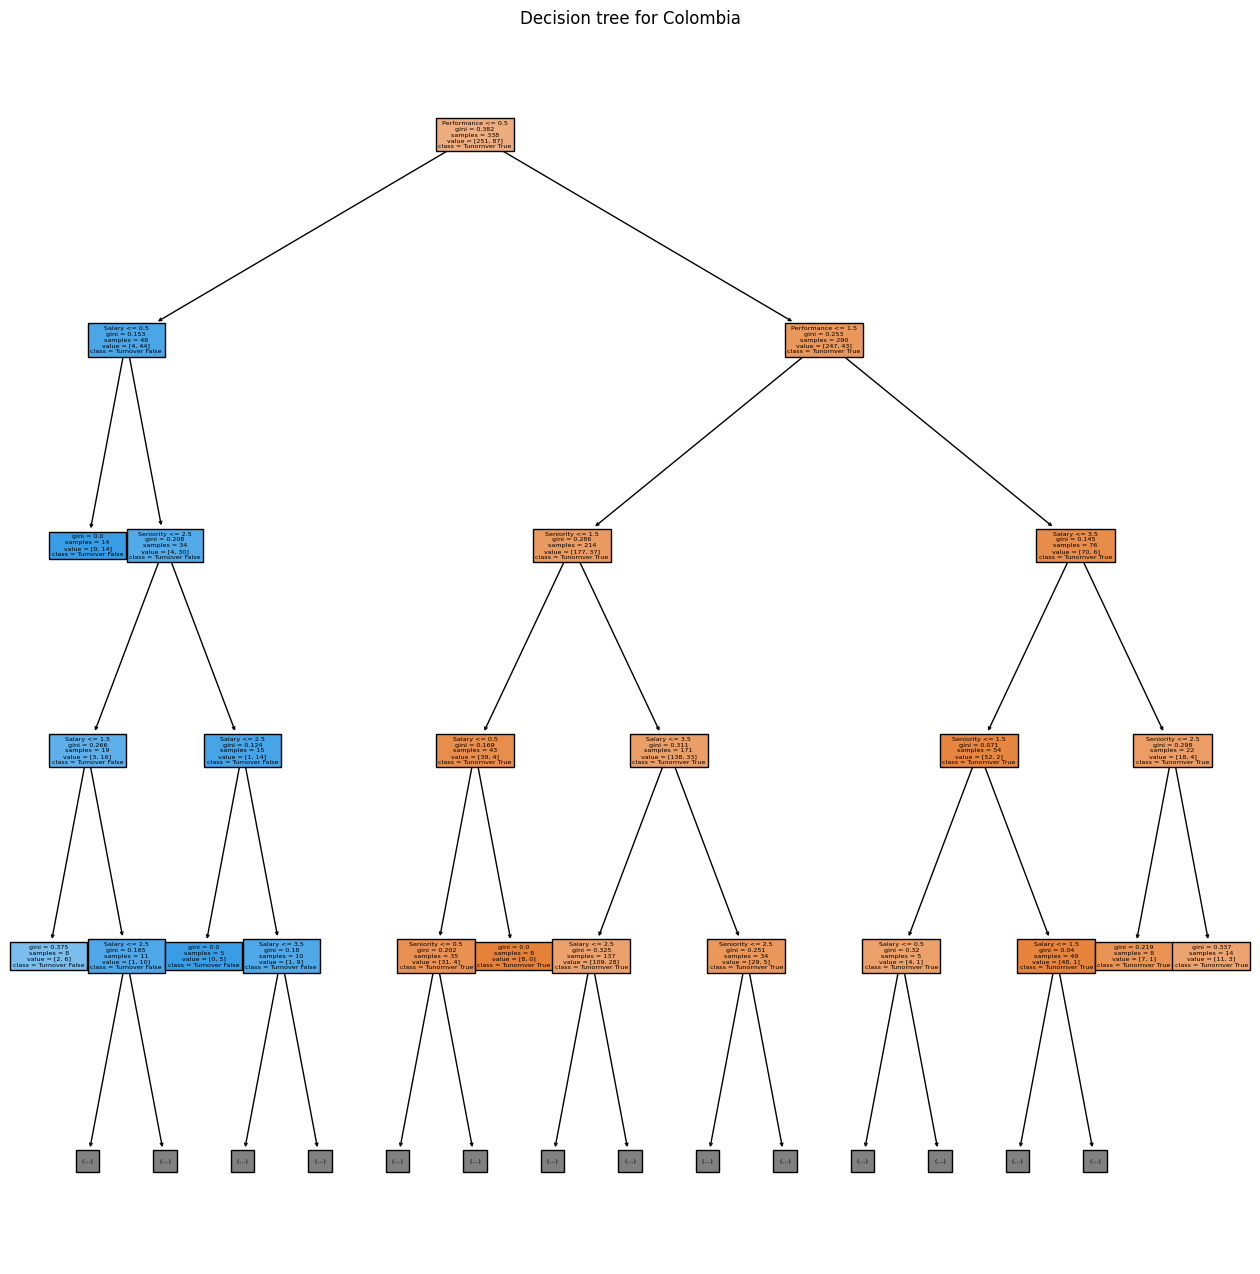

['Brazil', 'Colombia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mexico', 'Other', 'Peru', 'United States', 'Venezuela']
      Seniority  Salary  Performance
16          3.0     2.0          2.0
22          2.0     1.0          2.0
46          2.0     3.0          0.0
56          2.0     2.0          2.0
67          3.0     1.0          1.0
...         ...     ...          ...
2601        3.0     4.0          2.0
2612        4.0     4.0          2.0
2645        2.0     1.0          2.0
2653        3.0     2.0          2.0
2675        1.0     2.0          1.0

[204 rows x 3 columns]
16      False
22      False
46       True
56      False
67      False
        ...  
2601    False
2612    False
2645    False
2653    False
2675    False
Name: Turnover, Length: 204, dtype: bool


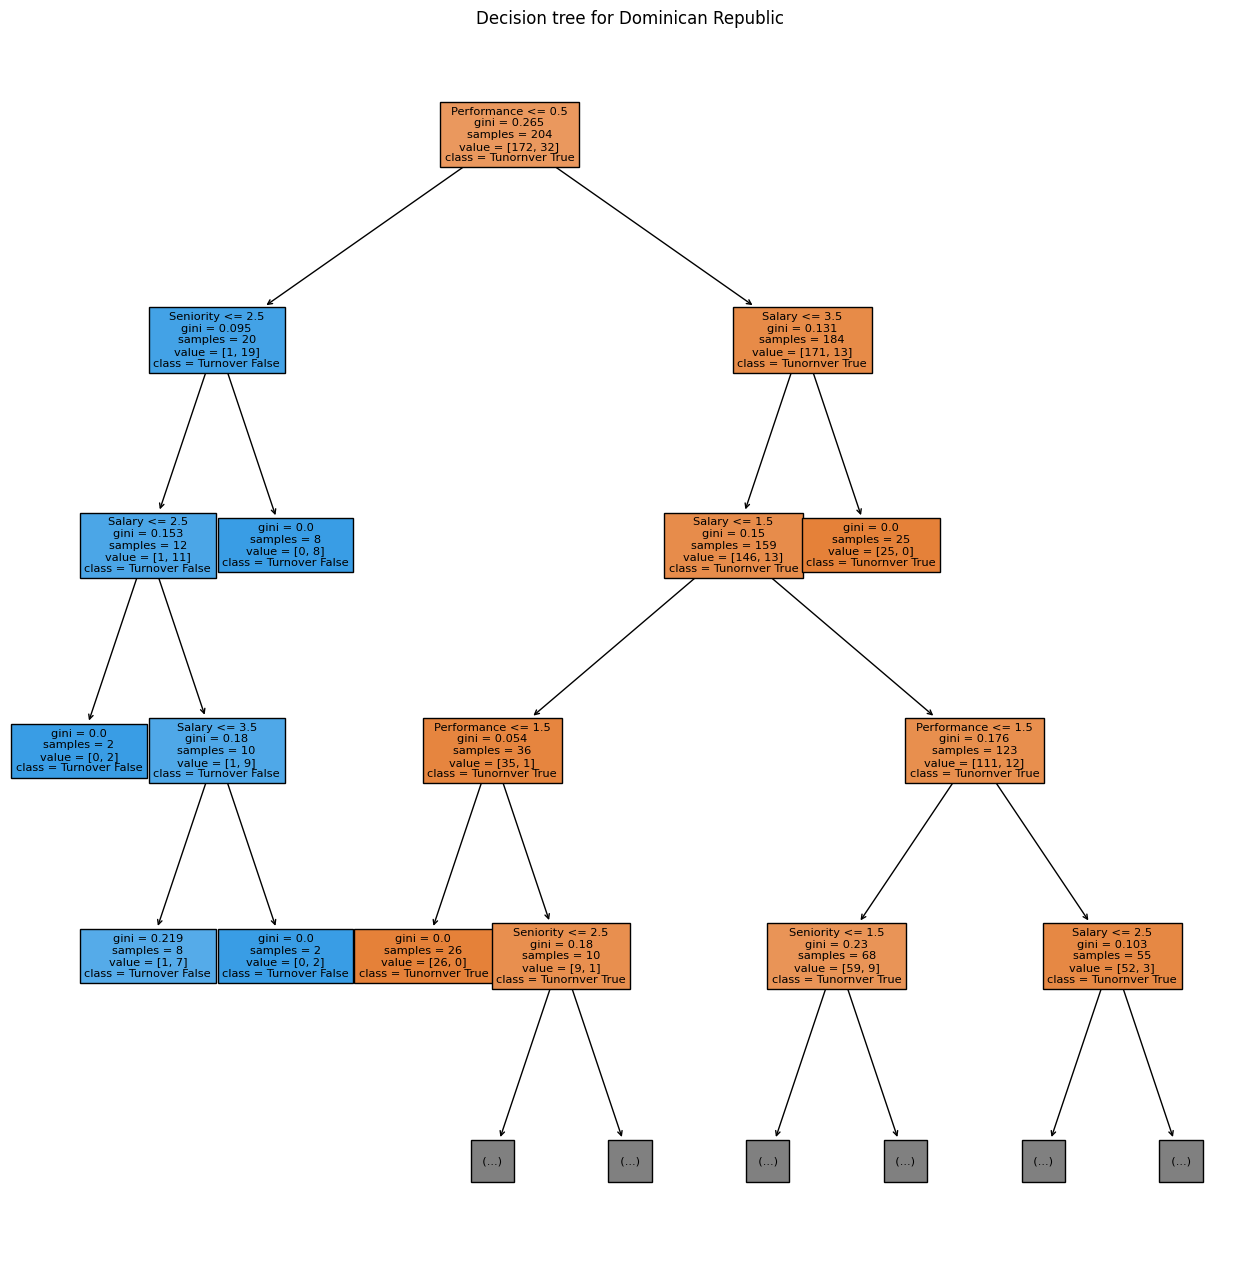

['Brazil', 'Colombia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mexico', 'Other', 'Peru', 'United States', 'Venezuela']
      Seniority  Salary  Performance
26          2.0     0.0          1.0
41          4.0     3.0          1.0
45          3.0     3.0          1.0
97          2.0     0.0          1.0
161         1.0     2.0          2.0
...         ...     ...          ...
2557        3.0     2.0          2.0
2561        3.0     2.0          2.0
2565        4.0     3.0          1.0
2650        2.0     3.0          2.0
2664        3.0     2.0          0.0

[90 rows x 3 columns]
26      False
41      False
45      False
97      False
161     False
        ...  
2557    False
2561    False
2565    False
2650    False
2664     True
Name: Turnover, Length: 90, dtype: bool


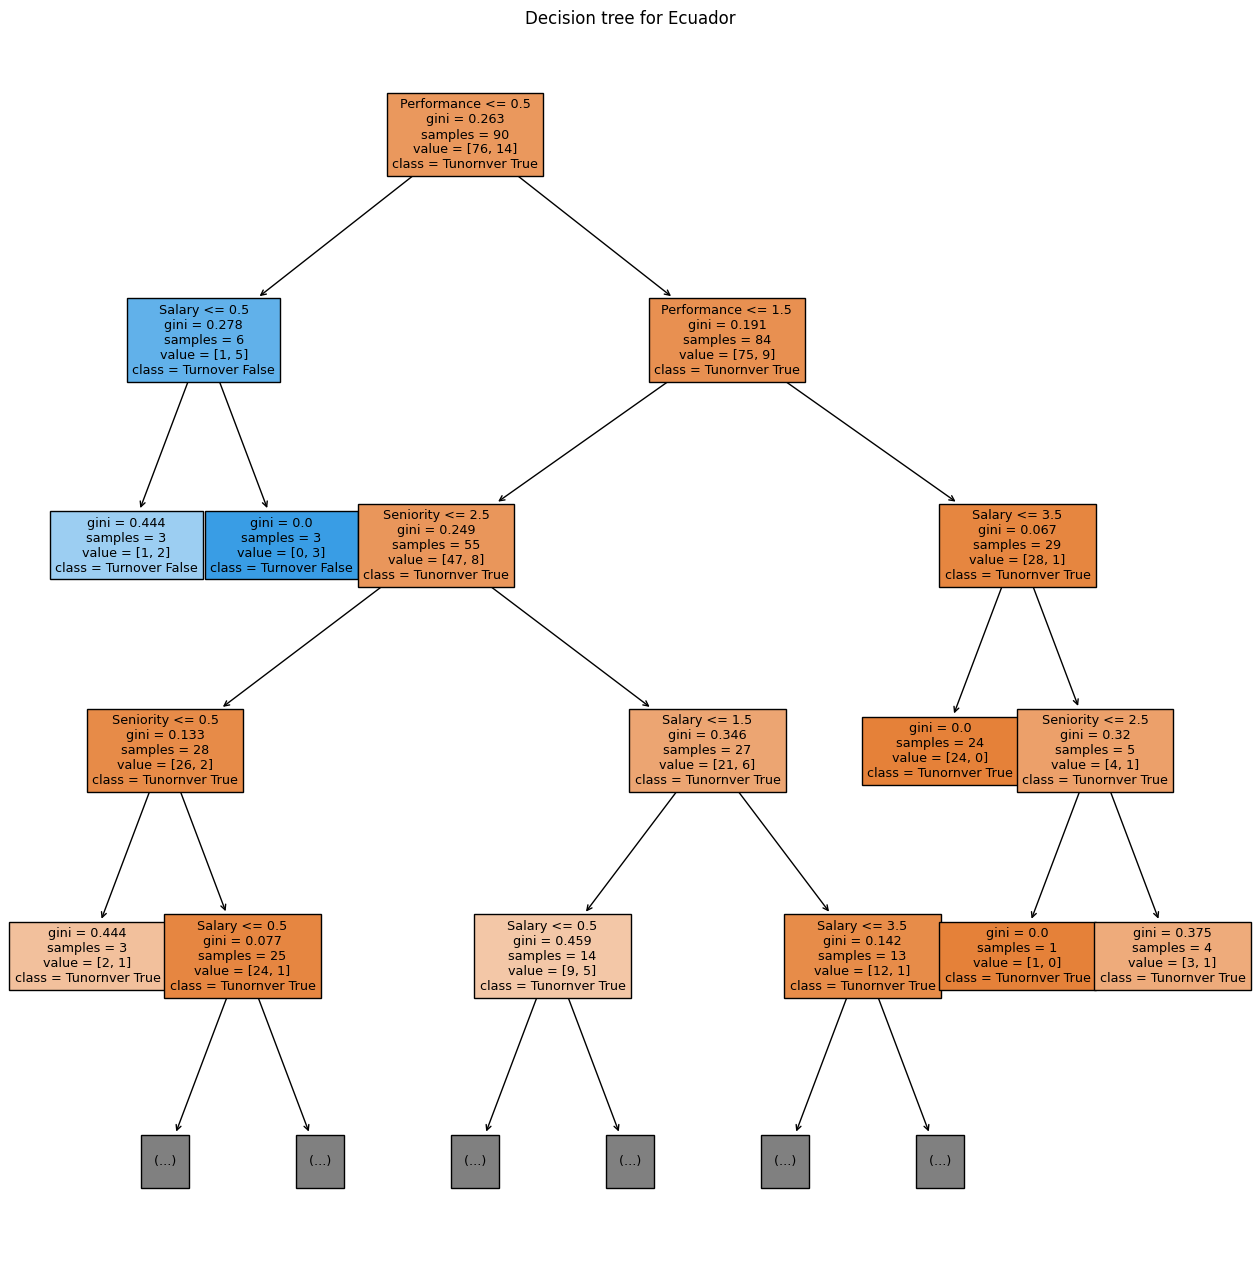

['Brazil', 'Colombia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mexico', 'Other', 'Peru', 'United States', 'Venezuela']
      Seniority  Salary  Performance
29          3.0     2.0          1.0
35          2.0     3.0          0.0
116         2.0     2.0          2.0
250         3.0     4.0          0.0
254         3.0     2.0          2.0
...         ...     ...          ...
2569        2.0     3.0          0.0
2602        3.0     3.0          0.0
2623        2.0     2.0          2.0
2665        3.0     2.0          2.0
2667        3.0     3.0          1.0

[79 rows x 3 columns]
29      False
35       True
116     False
250      True
254     False
        ...  
2569     True
2602     True
2623    False
2665    False
2667    False
Name: Turnover, Length: 79, dtype: bool


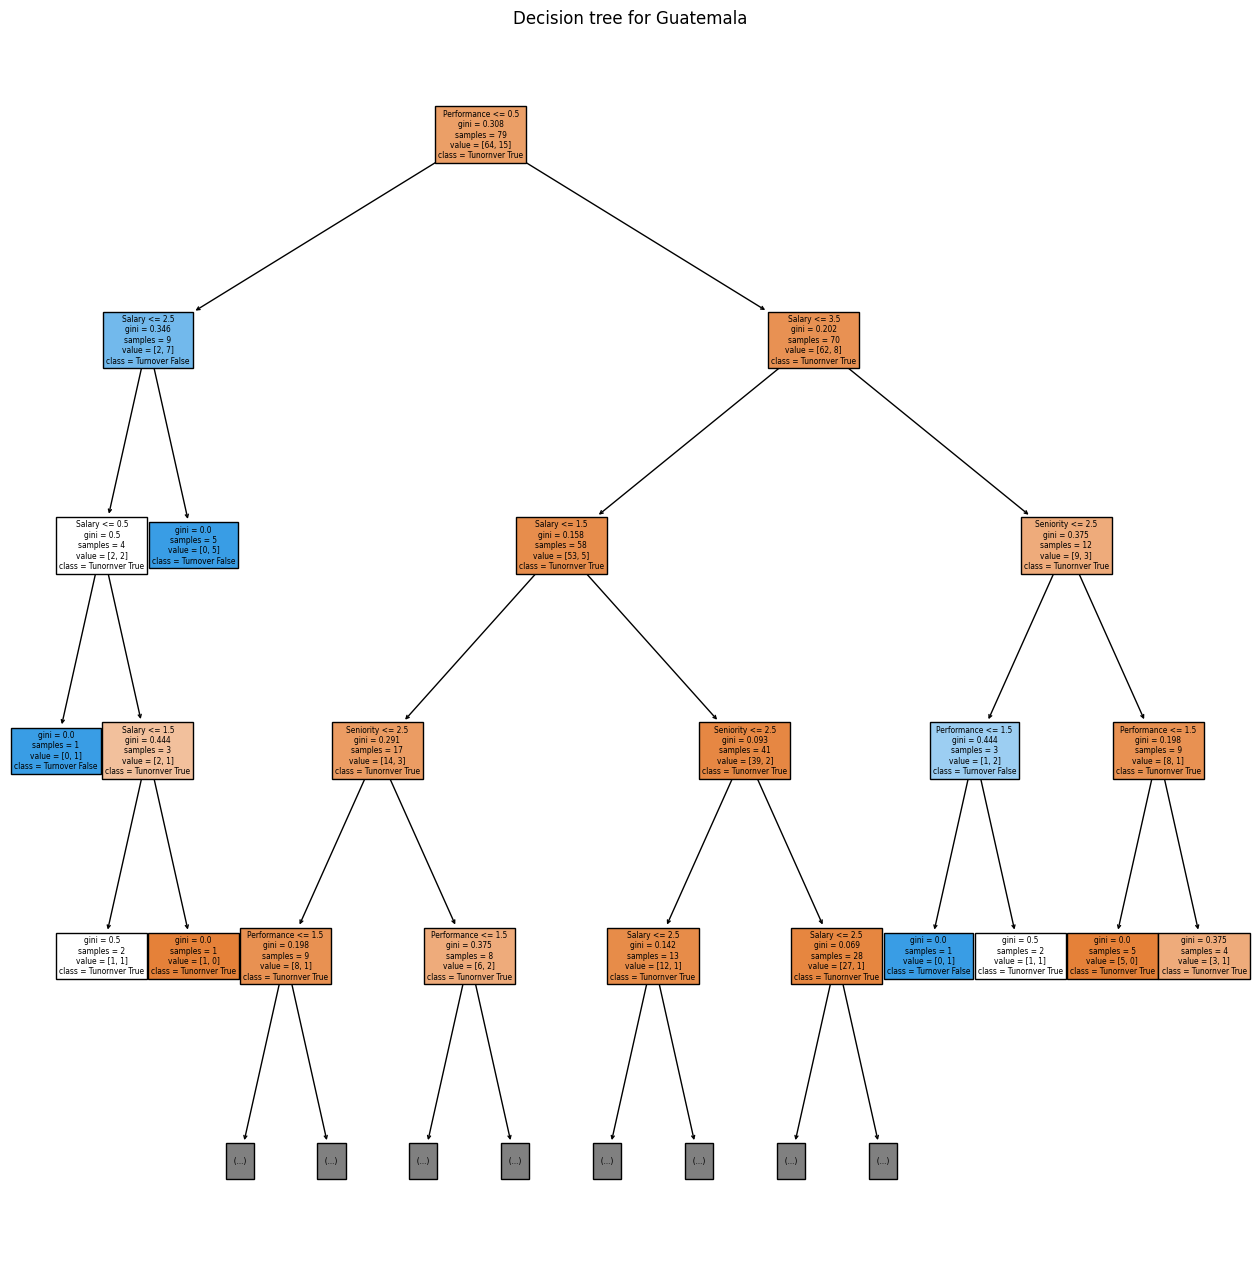

['Brazil', 'Colombia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mexico', 'Other', 'Peru', 'United States', 'Venezuela']
      Seniority  Salary  Performance
2           2.0     4.0          1.0
12          2.0     0.0          2.0
20          2.0     2.0          1.0
24          3.0     0.0          1.0
27          2.0     0.0          1.0
...         ...     ...          ...
2643        2.0     2.0          1.0
2647        3.0     4.0          2.0
2652        3.0     1.0          0.0
2657        3.0     1.0          1.0
2661        2.0     4.0          1.0

[287 rows x 3 columns]
2       False
12       True
20      False
24      False
27       True
        ...  
2643    False
2647     True
2652     True
2657     True
2661    False
Name: Turnover, Length: 287, dtype: bool


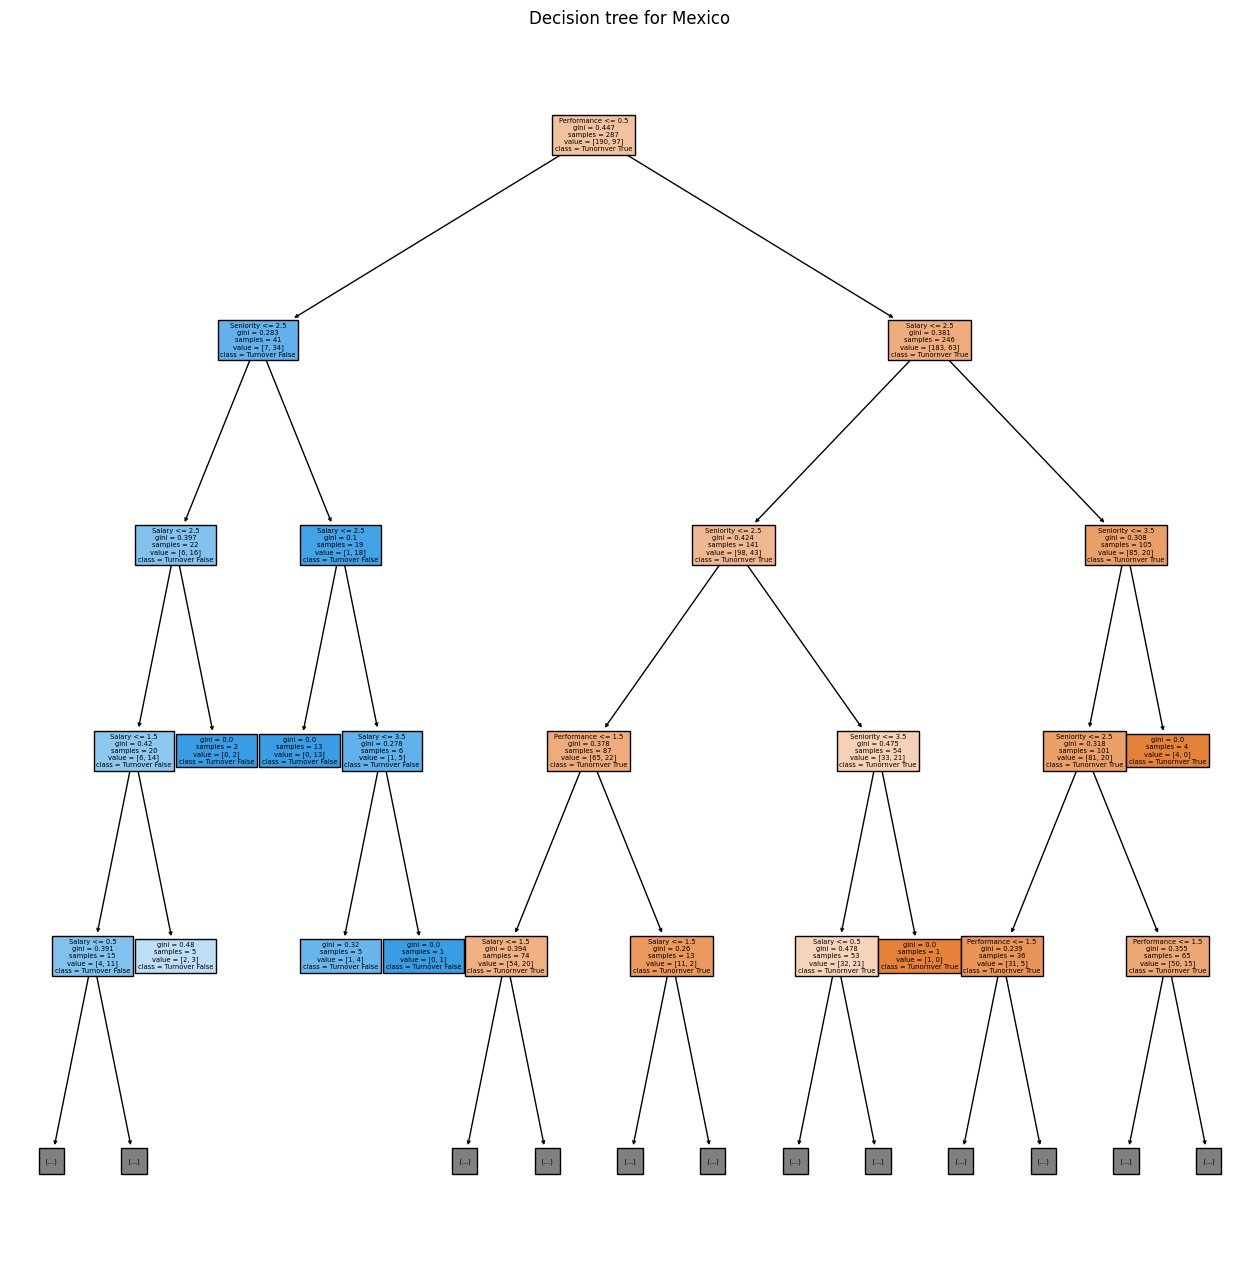

['Brazil', 'Colombia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mexico', 'Other', 'Peru', 'United States', 'Venezuela']
      Seniority  Salary  Performance
4           2.0     4.0          1.0
32          3.0     1.0          1.0
39          3.0     4.0          1.0
40          2.0     0.0          2.0
49          3.0     2.0          1.0
...         ...     ...          ...
2642        3.0     4.0          1.0
2644        2.0     0.0          1.0
2660        3.0     4.0          1.0
2672        3.0     1.0          2.0
2673        2.0     4.0          0.0

[468 rows x 3 columns]
4       False
32      False
39      False
40      False
49       True
        ...  
2642    False
2644    False
2660    False
2672    False
2673     True
Name: Turnover, Length: 468, dtype: bool


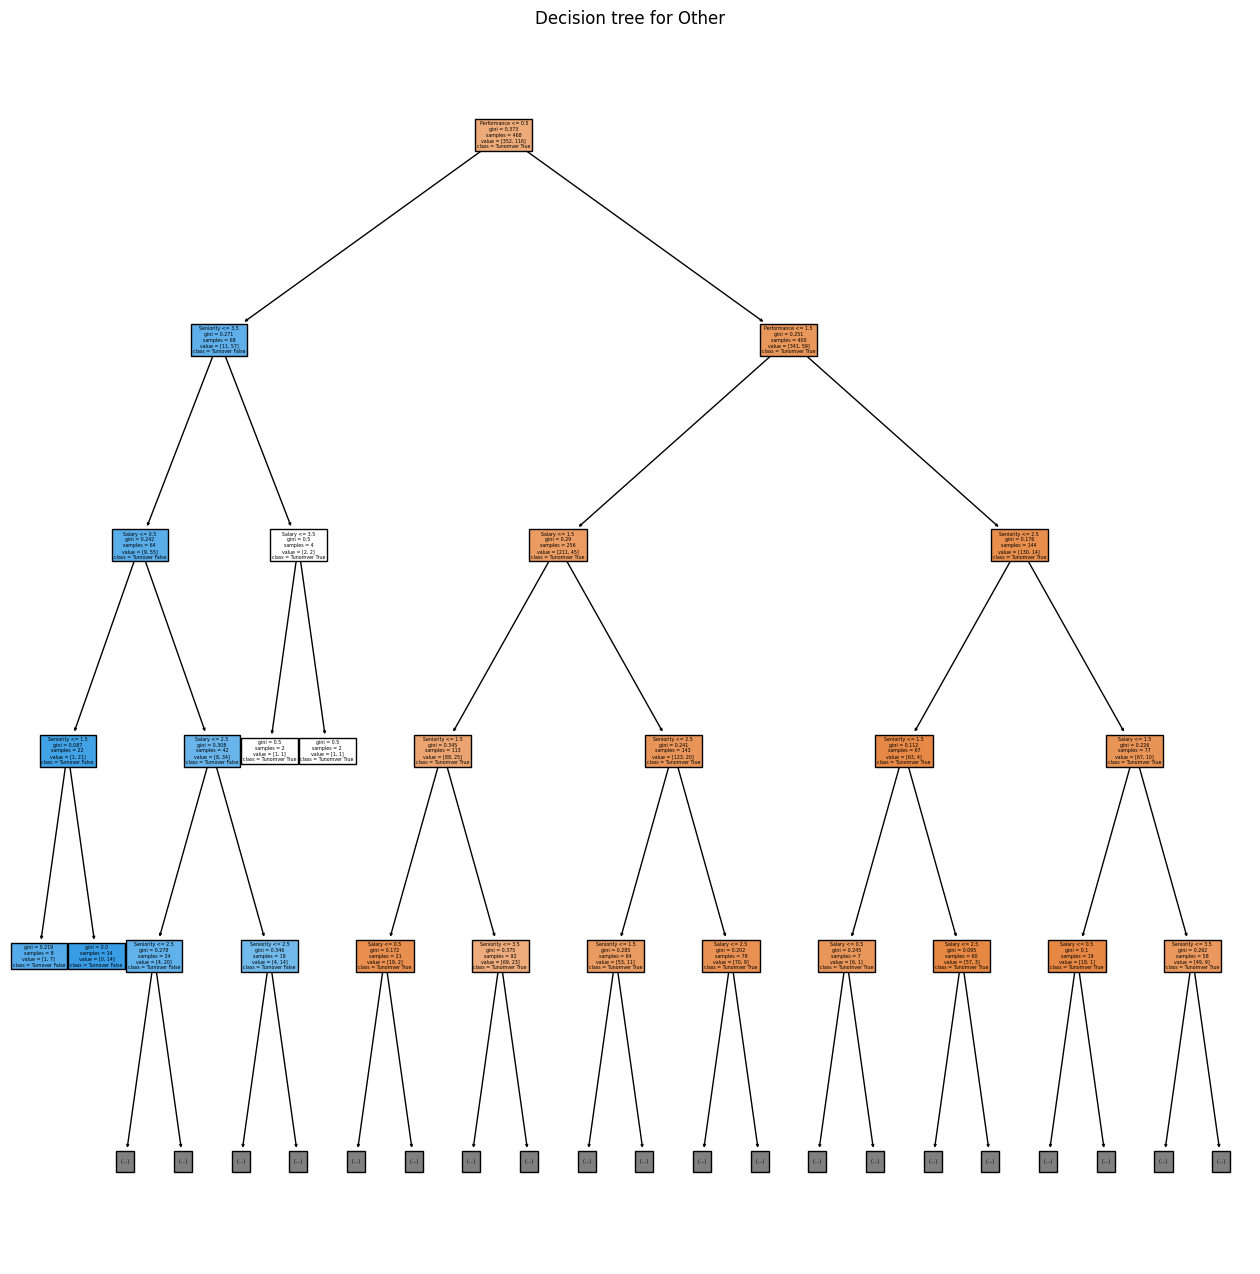

['Brazil', 'Colombia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mexico', 'Other', 'Peru', 'United States', 'Venezuela']
      Seniority  Salary  Performance
1           2.0     3.0          1.0
3           2.0     0.0          1.0
52          3.0     0.0          1.0
91          3.0     2.0          1.0
145         3.0     0.0          1.0
...         ...     ...          ...
2595        1.0     0.0          0.0
2604        3.0     0.0          0.0
2608        3.0     3.0          0.0
2627        2.0     0.0          1.0
2631        3.0     4.0          1.0

[114 rows x 3 columns]
1       False
3       False
52      False
91       True
145      True
        ...  
2595     True
2604     True
2608     True
2627    False
2631     True
Name: Turnover, Length: 114, dtype: bool


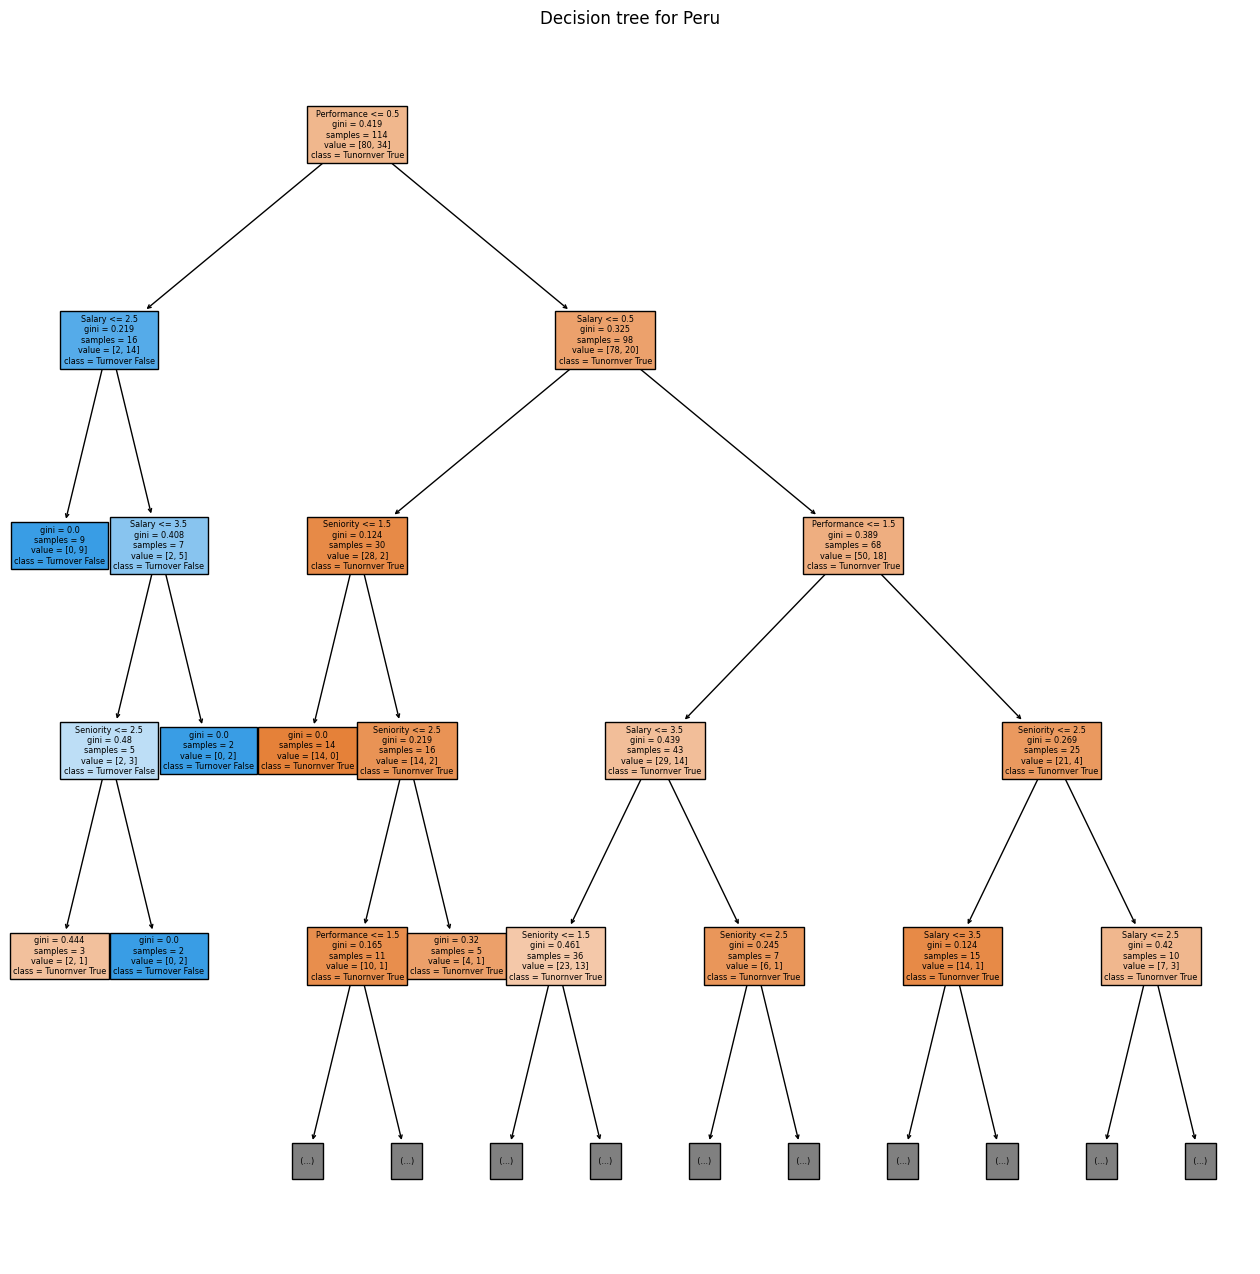

['Brazil', 'Colombia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mexico', 'Other', 'Peru', 'United States', 'Venezuela']
      Seniority  Salary  Performance
702         2.0     4.0          1.0
1232        3.0     4.0          2.0
1254        2.0     0.0          1.0
1353        3.0     4.0          1.0
1523        3.0     3.0          1.0
1861        3.0     4.0          0.0
702     False
1232    False
1254    False
1353     True
1523    False
1861     True
Name: Turnover, dtype: bool


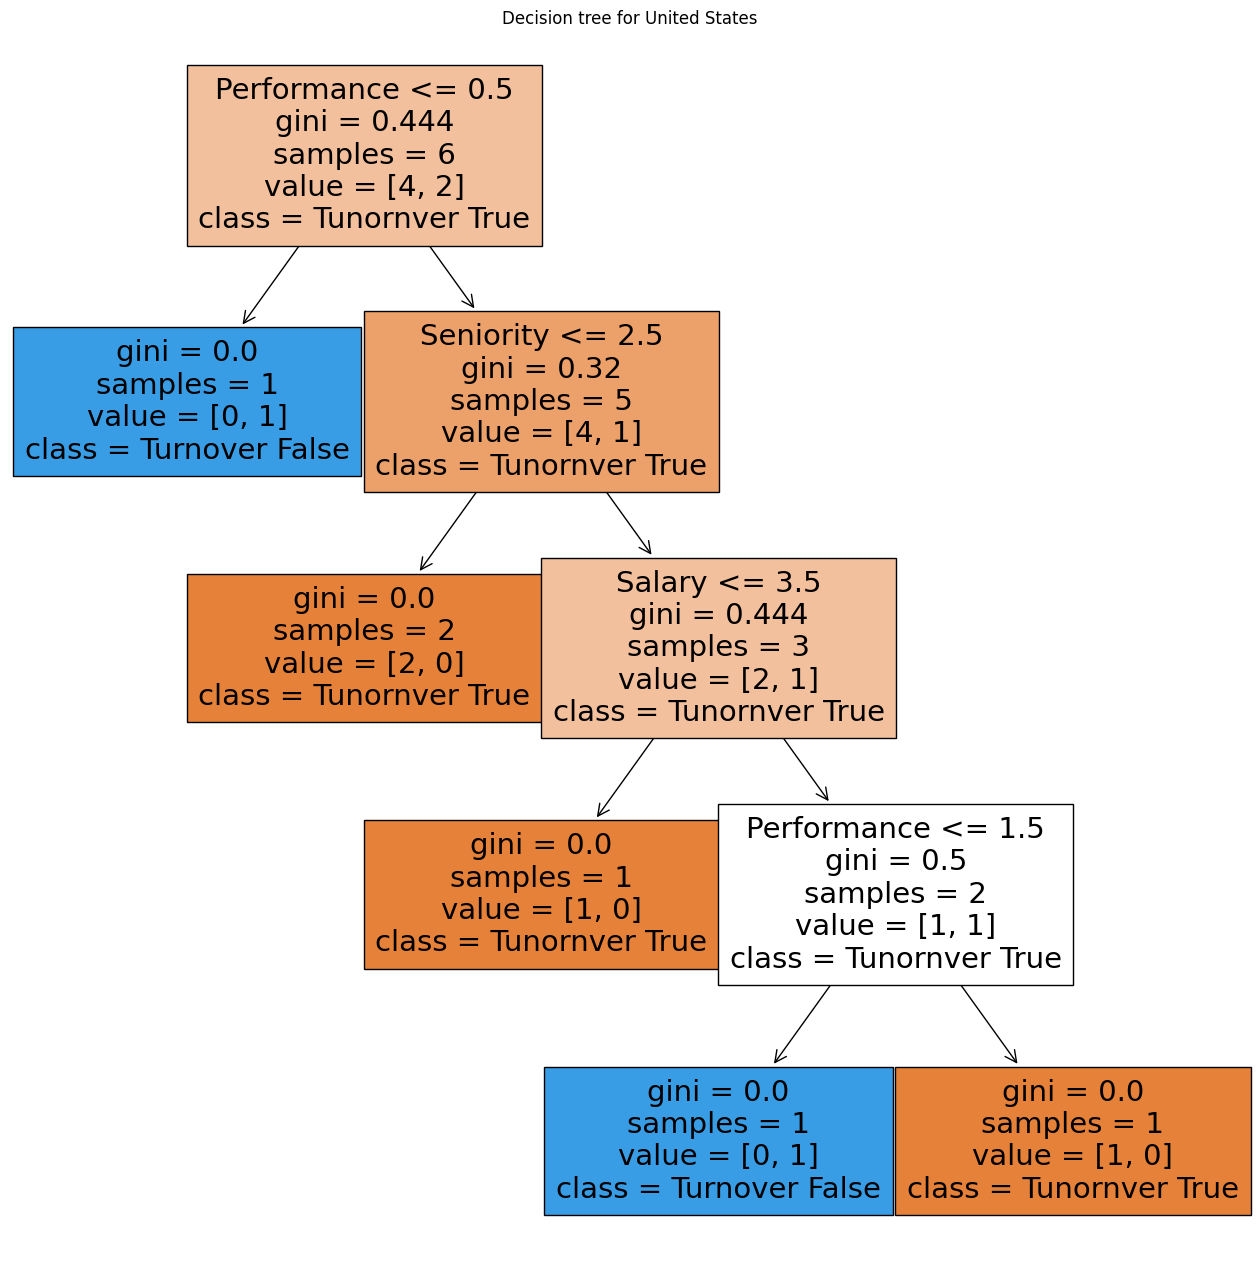

['Brazil', 'Colombia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mexico', 'Other', 'Peru', 'United States', 'Venezuela']
      Seniority  Salary  Performance
43          2.0     1.0          1.0
64          4.0     1.0          2.0
69          2.0     0.0          2.0
107         3.0     0.0          2.0
184         2.0     0.0          1.0
...         ...     ...          ...
2529        1.0     0.0          1.0
2614        4.0     1.0          1.0
2648        3.0     1.0          2.0
2654        3.0     1.0          2.0
2663        2.0     0.0          2.0

[92 rows x 3 columns]
43      False
64       True
69      False
107     False
184     False
        ...  
2529    False
2614    False
2648    False
2654    False
2663    False
Name: Turnover, Length: 92, dtype: bool


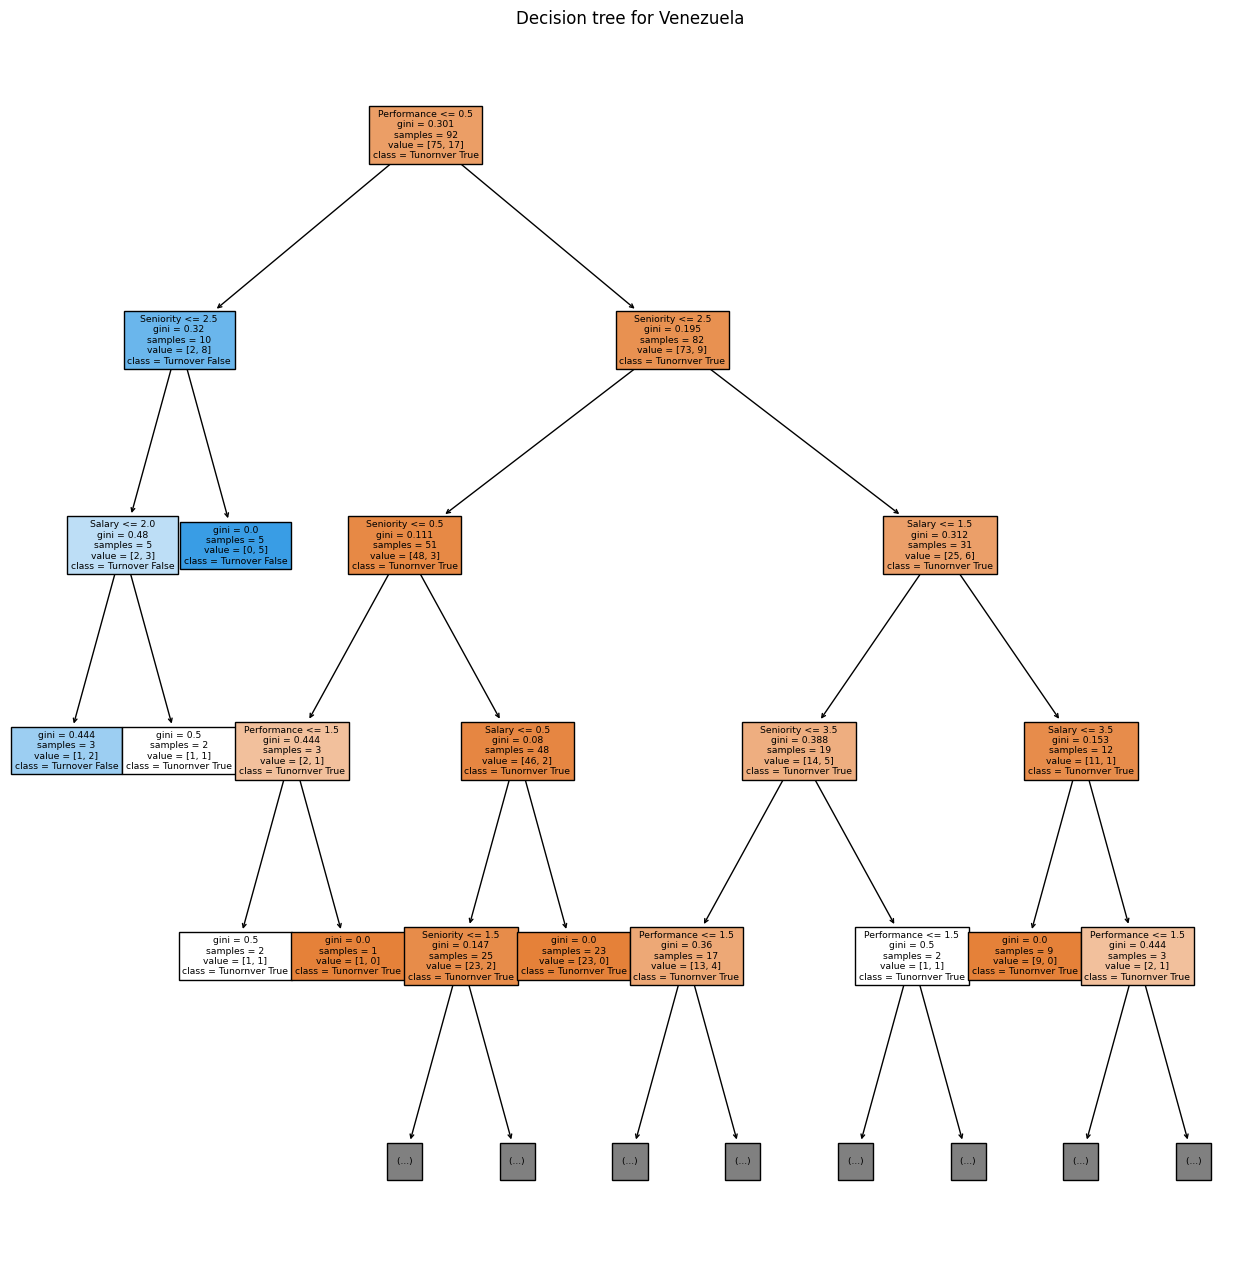

In [33]:
not_X_columns = countries.copy()
not_X_columns.extend(["Turnover", "Age", "Education", "Headcount","Time"])
for c, country in enumerate(countries):
    print(countries)
    country_df = joined_df[joined_df[country] == 1.0]    
    X = country_df.drop(not_X_columns, axis=1)
    Y = country_df["Turnover"]
    print(X)
    print(Y)
    clf = DecisionTreeClassifier().fit(X, Y)
    plt.figure(figsize=(16, 16))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Tunornver True", "Turnover False"], max_depth=4)
    plt.title(f"Decision tree for {country}")
    plt.show()

# XGBoost Trainning

I choosed a boosting tree model

## Genetic algorithm optimize hyperparams

In [60]:
from tqdm import tqdm
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score

class GA_XGBClassifier:

    MAX_DEPTH_INI_CHOICE = 10
    MIN_CHILD_WIDTH_INI_CHOICE = 10
    INIT_MOCK_FIT = 10
    MAX_EXTIMATORS_MIN_INI = 20

    def __init__(self, X_train, y_train, X_test, y_test, num_generations=10, size_population=10,
                 prob_cruz=0.4, prob_mut=0.5, qt_fits_max=5, max_extimators=100):

        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.num_generations = num_generations
        self.size_population = size_population
        self.prob_cruz = prob_cruz
        self.prob_mut = prob_mut
        self.qt_fits_max = qt_fits_max
        self.max_extimators = max_extimators

    def gen_population(self):
        sizepop = self.size_population

        population = [['']]*sizepop
        objective = ['reg:squarederror', 'reg:tweedie']
        booster = ['gbtree', 'gblinear', 'dart']
        for i in range(0, sizepop):
            population[i] = [np.random.choice(objective), np.random.randint(1, self.MAX_DEPTH_INI_CHOICE), np.random.randint(1, self.MIN_CHILD_WIDTH_INI_CHOICE),
                             np.random.rand(), np.random.rand(), np.random.randint(self.MAX_EXTIMATORS_MIN_INI, self.max_extimators),
                             np.random.choice(booster), self.INIT_MOCK_FIT]

        return population

    def set_fitness(self, population):
        for i in range(0, len(population)):
            xg_class_volatil = xgb.XGBClassifier(objective=population[i][0], max_depth=population[i][1],
                                                 min_child_weight=population[i][2], subsample=population[i][3],
                                                 colsample_bytree=population[i][4], n_estimators=population[i][5],
                                                 booster=population[i][6], eval_metric='mae')

            xg_class_volatil.fit(self.X_train, self.y_train)            
            y_hat = xg_class_volatil.predict(self.X_test)            
            mae_fits = balanced_accuracy_score(
                self.y_test, y_hat)
            population[i][-1] = mae_fits

        return population

    def new_gen(self, population):

        def takeLast(elem):
            return elem[:][-1]

        def cruzamento(population, prob_cruz=self.prob_cruz):
            qt_cross = len(population[0])
            pop_ori = population

            for p in range(int(self.size_population*0.1), int(len(pop_ori)/2)):
                if np.random.rand() > prob_cruz:
                    population[p][0:int(qt_cross/2)
                                  ] = pop_ori[2*p][0:int(qt_cross/2)]
                if np.random.rand() > prob_cruz:
                    population[p][int(
                        qt_cross/2):qt_cross] = pop_ori[2*p][int(qt_cross/2):qt_cross]

            for p in range(int(self.size_population*0.1), int(len(pop_ori)/2)):
                if np.random.rand() > prob_cruz:
                    population[p][0:int(
                        qt_cross/2)] = pop_ori[int(p/2)][0:int(qt_cross/2)]
                if np.random.rand() > prob_cruz:
                    population[p][int(
                        qt_cross/2):qt_cross] = pop_ori[int(p/2)][int(qt_cross/2):qt_cross]

            return population

        def mutation(population, prob_mut=self.prob_mut):
            for p in range(int(self.size_population*0.1), len(population)):                
                if np.random.rand() > prob_mut:
                    population[p][1] = int(
                        population[p][1]*(1+np.random.rand()))
                if np.random.rand() > prob_mut:
                    population[p][2] = int(
                        population[p][2]*(1+np.random.rand()))
                if np.random.rand() > prob_mut:
                    population[p][3] = np.clip(
                        population[p][3]*(1.5 - np.random.rand()), 0, 1)
                if np.random.rand() > prob_mut:
                    population[p][4] = np.clip(
                        population[p][4]*(1.5 + np.random.rand()), 0, 1)
                if np.random.rand() > prob_mut:
                    population[p][5] = int(
                        population[p][5]*(1+np.random.rand()))

            return population

        population = sorted(population, key=takeLast, reverse=True)
        population = cruzamento(population)
        population = mutation(population)
        population = self.set_fitness(population)
        population = sorted(population, key=takeLast, reverse=True)

        return population

    def takeLast(self, elem):
        return elem[:][-1]

    def search_best(self):
        population = self.gen_population()
        population = self.set_fitness(population)
        for ng in tqdm(range(0, self.num_generations)):
            population = self.new_gen(population)
            gen_sorted = sorted(population, key=self.takeLast, reverse=True)[:]
            print(list(map(lambda p: p[-1], gen_sorted)))        

        best = sorted(population, key=self.takeLast, reverse=True)[0][:]

        return best

## Search best model

In [63]:
d = {True: 1, False: 0}
X_train, X_test, y_train, y_test = train_test_split(df.drop("E", axis=1).values, df["E"].apply(lambda x: d[x]).values, test_size=0.2)
ga_xgbclassifier = GA_XGBClassifier(X_train, y_train, X_test, y_test, num_generations=5, size_population=10,
                 prob_cruz=0.5, prob_mut=0.5, max_extimators=100)
best_model = ga_xgbclassifier.search_best()

[20:23:10] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

[20:23:14] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.



  0%|          | 0/5 [00:00<?, ?it/s]

[20:23:29] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.



 20%|██        | 1/5 [00:06<00:27,  6.91s/it]

[0.7337608760876088, 0.7336858685868587, 0.7314356435643564, 0.7312106210621062, 0.7186093609360936, 0.7148214821482148, 0.7012076207620762, 0.6895439543954396, 0.6507275727572757, 0.6502775277527753]
[20:23:44] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.



 40%|████      | 2/5 [00:22<00:36, 12.06s/it]

[0.7363861386138614, 0.7337608760876088, 0.7337608760876088, 0.7274227422742274, 0.7210846084608461, 0.7148214821482148, 0.6756300630063006, 0.671917191719172, 0.6695919591959196, 0.6502775277527753]
[20:23:55] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.



 60%|██████    | 3/5 [00:35<00:24, 12.27s/it]

[0.7642889288928894, 0.7581758175817581, 0.7404740474047404, 0.7363861386138614, 0.7198469846984699, 0.7148214821482148, 0.6846684668466847, 0.6584533453345334, 0.6556780678067806, 0.6502775277527753]
[20:24:11] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.



 80%|████████  | 4/5 [01:09<00:20, 20.93s/it]

[0.7820657065706571, 0.7642889288928894, 0.7632763276327633, 0.7557005700570057, 0.7504500450045004, 0.7148214821482148, 0.7071707170717072, 0.6834308430843083, 0.6681293129312931, 0.6432268226822682]
[20:24:52] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.



100%|██████████| 5/5 [01:36<00:00, 19.27s/it]

[0.7820657065706571, 0.7657515751575157, 0.7618886888688869, 0.7455745574557455, 0.721009600960096, 0.7148214821482148, 0.7035328532853286, 0.6681293129312931, 0.6494899489948995, 0.6291629162916291]


### Dump best

In [65]:
import joblib

joblib.dump(xgb.XGBClassifier(objective=best_model[0], max_depth=best_model[1],
                              min_child_weight=best_model[2], subsample=best_model[3],
                              colsample_bytree=best_model[4], n_estimators=best_model[5],
                              booster=best_model[6]).fit(X_train,y_train), "../models/best_xgboost.pickle")


['../models/best_xgboost.pickle']